<a href="https://colab.research.google.com/github/Luzdeyduque/Proyecto-de-grado-DPMVUTML-/blob/main/Modelos/Vocal_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Librerias


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, accuracy_score, f1_score, r2_score, log_loss
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
import joblib
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
from google.colab import files
from IPython.display import display
import numpy as np

#Carga de datos

In [ ]:
# Selecciona y sube el archivo CSV desde tu computadora
uploaded = files.upload()

# Cargar el dataset desde el archivo CSV subido
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)


Saving A_Mezclada.csv to A_Mezclada.csv


#Visualización y procesamiento de datos

##Visualización de datos sin depurar

In [ ]:
# Eliminar las columnas no deseadas (columnas Unnamed)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#Datos sin procesar
print('Número de características en el dataset sin depurar:', df.shape[1])
print('Número de datos en el dataset :                     ', df.shape[0],'\n')

print("Dataset sin depurar:")
display(df.head(300))

Número de características en el dataset sin depurar: 19
Número de datos en el dataset :                      300 

Dataset sin depurar:


,AUDIO,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,Gender
0,AVPEPUDEAC0034a3,176.196,178.147,174.351,0.149,0.000008,0.079,0.088,0.237,2.113,0.184,1.164,1.250,1.714,3.491,0.001667,30.572,0,1
1,AVPEPUDEAC0016a3,206.116,211.597,197.393,0.147,0.000007,0.076,0.077,0.228,1.608,0.139,0.881,0.978,1.285,2.642,0.000974,30.784,0,0
2,AVPEPUDEA0025a2,153.644,159.879,149.975,0.361,0.000024,0.127,0.199,0.382,7.641,0.689,3.249,4.581,9.639,9.747,0.004516,25.247,1,1
3,AVPEPUDEA0039a3,174.879,181.068,166.741,0.590,0.000034,0.333,0.318,0.999,7.819,0.692,4.276,5.029,6.718,12.829,0.008403,24.156,1,1
4,AVPEPUDEAC0028a2,288.300,296.744,284.241,0.416,0.000014,0.256,0.192,0.769,4.149,0.364,2.443,2.099,2.939,7.329,0.000558,34.367,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,AVPEPUDEAC0053a3,169.976,173.284,162.330,0.187,0.000011,0.073,0.086,0.220,1.836,0.181,0.717,0.975,2.199,2.151,0.003093,27.861,0,0
296,AVPEPUDEAC0029a3,266.320,269.182,257.280,0.097,0.000004,0.044,0.053,0.131,3.935,0.359,2.201,2.185,2.862,6.602,0.001358,32.613,0,0
297,AVPEPUDEAC0048a2,154.041,160.782,149.847,0.220,0.000014,0.100,0.116,0.299,2.821,0.256,1.156,1.597,2.969,3.467,0.001304,30.510,0,1
298,AVPEPUDEA0046a1,150.689,152.484,148.588,0.221,0.000015,0.106,0.126,0.319,5.439,0.481,3.085,3.220,4.871,9.256,0.001784,29.637,1,1


In [ ]:
print("\nCuenta los datos Non-Null y Dtype: \n")
df.info()


Cuenta los datos Non-Null y Dtype: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AUDIO             300 non-null    object 
 1   MDVP:Fo(Hz)       300 non-null    float64
 2   MDVP:Fhi(Hz)      300 non-null    float64
 3   MDVP:Flo(Hz)      300 non-null    float64
 4   MDVP:Jitter(%)    300 non-null    float64
 5   MDVP:Jitter(Abs)  300 non-null    float64
 6   MDVP:RAP          300 non-null    float64
 7   MDVP:PPQ          300 non-null    float64
 8   Jitter:DDP        300 non-null    float64
 9   MDVP:Shimmer      300 non-null    float64
 10  MDVP:Shimmer(dB)  300 non-null    float64
 11  Shimmer:APQ3      300 non-null    float64
 12  Shimmer:APQ5      300 non-null    float64
 13  MDVP:APQ          300 non-null    float64
 14  Shimmer:DDA       300 non-null    float64
 15  NHR               300 non-null    float64
 16  HNR   

##Depuración de datos

In [ ]:
df.drop(['AUDIO'], axis=1, inplace=True) #Elimina la columna AUDIO
df['STATUS'] = df['status'].astype('uint8') #Baja de INT68 a INT8
df.drop(['status'], axis=1, inplace=True) #Elimina la columna de status para que solo quede STATUS
df['Gender'] = df['Gender'].astype('uint8') #Baja de INT68 a INT8
df.drop(['Gender'], axis=1, inplace=True) #Elimina la columna de Gender

#Datos depurados
print('Número de características en el dataset depurado: ', df.shape[1])
print('Número de datos en el dataset:                    ', df.shape[0])

Número de características en el dataset depurado:  17
Número de datos en el dataset:                     300


##Visualización

In [ ]:
# Se revisa si el dataset tiene filas duplicadas
print('Número de filas duplicadas :',df.duplicated().sum())

Número de filas duplicadas : 0


In [ ]:
# Se revisa si las columnas tiene columnas faltantes
df.isna().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


In [ ]:
print("Dataset depurado:")
display(df.head(300))

Dataset depurado:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,STATUS
0,176.196,178.147,174.351,0.149,0.000008,0.079,0.088,0.237,2.113,0.184,1.164,1.250,1.714,3.491,0.001667,30.572,0
1,206.116,211.597,197.393,0.147,0.000007,0.076,0.077,0.228,1.608,0.139,0.881,0.978,1.285,2.642,0.000974,30.784,0
2,153.644,159.879,149.975,0.361,0.000024,0.127,0.199,0.382,7.641,0.689,3.249,4.581,9.639,9.747,0.004516,25.247,1
3,174.879,181.068,166.741,0.590,0.000034,0.333,0.318,0.999,7.819,0.692,4.276,5.029,6.718,12.829,0.008403,24.156,1
4,288.300,296.744,284.241,0.416,0.000014,0.256,0.192,0.769,4.149,0.364,2.443,2.099,2.939,7.329,0.000558,34.367,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,169.976,173.284,162.330,0.187,0.000011,0.073,0.086,0.220,1.836,0.181,0.717,0.975,2.199,2.151,0.003093,27.861,0
296,266.320,269.182,257.280,0.097,0.000004,0.044,0.053,0.131,3.935,0.359,2.201,2.185,2.862,6.602,0.001358,32.613,0
297,154.041,160.782,149.847,0.220,0.000014,0.100,0.116,0.299,2.821,0.256,1.156,1.597,2.969,3.467,0.001304,30.510,0
298,150.689,152.484,148.588,0.221,0.000015,0.106,0.126,0.319,5.439,0.481,3.085,3.220,4.871,9.256,0.001784,29.637,1


In [ ]:
print("\ncUENTA DE VALORES Non-Null Y Dtype DE LAS CARACTERÍSTICAS: \n")
df.info()


cUENTA DE VALORES Non-Null Y Dtype DE LAS CARACTERÍSTICAS: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       300 non-null    float64
 1   MDVP:Fhi(Hz)      300 non-null    float64
 2   MDVP:Flo(Hz)      300 non-null    float64
 3   MDVP:Jitter(%)    300 non-null    float64
 4   MDVP:Jitter(Abs)  300 non-null    float64
 5   MDVP:RAP          300 non-null    float64
 6   MDVP:PPQ          300 non-null    float64
 7   Jitter:DDP        300 non-null    float64
 8   MDVP:Shimmer      300 non-null    float64
 9   MDVP:Shimmer(dB)  300 non-null    float64
 10  Shimmer:APQ3      300 non-null    float64
 11  Shimmer:APQ5      300 non-null    float64
 12  MDVP:APQ          300 non-null    float64
 13  Shimmer:DDA       300 non-null    float64
 14  NHR               300 non-null    float64
 15  HNR               300 non-nul

<Axes: xlabel='STATUS', ylabel='count'>

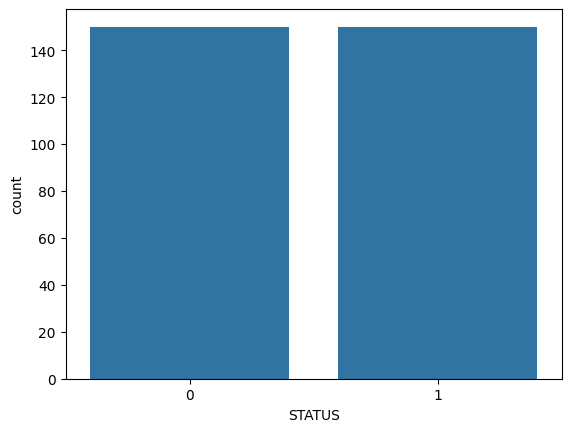

In [ ]:
# Se explora que el dataset no está balanceado
df['STATUS'].value_counts()
sns.countplot(x='STATUS',data=df)

In [ ]:
df.describe() #Descripción estadística

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,STATUS
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,169.705633,177.091808,157.968853,0.526905,0.000034,0.271845,0.272178,0.815465,4.932570,0.445337,2.453305,2.799972,4.242822,7.354078,0.011154,26.685955,0.500000
std,45.258373,47.098459,47.583505,0.603375,0.000039,0.347975,0.310601,1.043984,3.879681,0.347879,2.310258,2.057115,2.730793,6.935240,0.026198,5.460386,0.500835
min,92.178000,96.603000,49.397000,0.097000,0.000004,0.044000,0.053000,0.131000,0.969000,0.085000,0.283000,0.460000,0.778000,0.848000,0.000167,7.089000,0.000000
25%,133.008500,138.546750,124.053750,0.233750,0.000014,0.103750,0.121500,0.310750,2.402500,0.218750,1.126750,1.372500,2.317500,3.380500,0.001507,23.215750,0.000000
50%,167.882000,173.952000,154.363000,0.337000,0.000021,0.150500,0.176000,0.452000,3.787000,0.343500,1.694000,2.147500,3.400500,5.082500,0.003777,27.058000,0.500000
75%,198.046250,206.007000,188.081000,0.529250,0.000037,0.255250,0.272125,0.766000,5.925250,0.535250,2.919500,3.503250,5.494750,8.759250,0.010000,30.423250,1.000000
max,342.945000,346.457000,338.374000,4.225000,0.000340,2.811000,2.496000,8.434000,31.482000,2.796000,20.880000,12.486000,16.708000,62.641000,0.280327,39.154000,1.000000


#Métodos de selección de características

##Calculo de χ²

In [ ]:
# Variable objetivo y características
discrete_df = pd.DataFrame() #Hace que el type de discrete_df sea DF

# Discretizar todas las variables continuas
for column in df.columns:
    if df[column].dtype in ['float64']:  # Verificar si es continua (float o int)
        discrete_df[column + '_discretized'] = pd.qcut(df[column], q=9, labels=False)  # Discretizar en 9 intervalos
        #Donde 'q' se haya con la fórmula de Criterio de Sturges : q = log2(n)+1, donde n es el número de datos (300)
    else:
        discrete_df[column] = df[column]  # No discretiza

X = discrete_df.drop(columns=['STATUS'])
y = df['STATUS']

# Estandarizar los datos: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("\nX_scaled")
X_scaled.head(300)# Este no sirve porque está discretizado



X_scaled


,MDVP:Fo(Hz)_discretized,MDVP:Fhi(Hz)_discretized,MDVP:Flo(Hz)_discretized,MDVP:Jitter(%)_discretized,MDVP:Jitter(Abs)_discretized,MDVP:RAP_discretized,MDVP:PPQ_discretized,Jitter:DDP_discretized,MDVP:Shimmer_discretized,MDVP:Shimmer(dB)_discretized,Shimmer:APQ3_discretized,Shimmer:APQ5_discretized,MDVP:APQ_discretized,Shimmer:DDA_discretized,NHR_discretized,HNR_discretized
0,0.625,0.500,0.625,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.250,0.125,0.125,0.250,0.250,0.750
1,0.875,0.875,0.875,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.125,0.125,0.875
2,0.375,0.375,0.500,0.625,0.500,0.375,0.625,0.375,0.875,0.875,0.875,0.875,1.000,0.875,0.500,0.375
3,0.625,0.500,0.625,0.875,0.750,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.750,0.250
4,1.000,1.000,1.000,0.625,0.250,0.750,0.500,0.750,0.625,0.500,0.750,0.500,0.375,0.750,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.500,0.500,0.500,0.125,0.125,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.250,0.000,0.375,0.625
296,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.500,0.500,0.625,0.500,0.375,0.625,0.250,0.875
297,0.375,0.375,0.500,0.125,0.250,0.125,0.125,0.125,0.250,0.250,0.250,0.250,0.375,0.250,0.125,0.750
298,0.375,0.375,0.500,0.250,0.250,0.250,0.250,0.250,0.750,0.750,0.875,0.750,0.750,0.875,0.250,0.750


In [ ]:
# Aplicar SelectKBest con chi-cuadrado
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_scaled, y)

# Obtener y visualizar los puntajes χ²
chi2_scores = chi2_selector.scores_
feature_scores = pd.DataFrame({'Feature': X_scaled.columns, 'Chi2 Score': chi2_scores})
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)
print(feature_scores)

                         Feature  Chi2 Score
3     MDVP:Jitter(%)_discretized    5.467160
12          MDVP:APQ_discretized    5.320417
6           MDVP:PPQ_discretized    4.843357
15               HNR_discretized    4.770417
5           MDVP:RAP_discretized    4.705193
4   MDVP:Jitter(Abs)_discretized    4.681667
8       MDVP:Shimmer_discretized    4.681667
9   MDVP:Shimmer(dB)_discretized    4.641472
7         Jitter:DDP_discretized    4.553899
11      Shimmer:APQ5_discretized    3.724041
14               NHR_discretized    3.010417
10      Shimmer:APQ3_discretized    2.733750
13       Shimmer:DDA_discretized    2.666667
1       MDVP:Fhi(Hz)_discretized    0.326667
2       MDVP:Flo(Hz)_discretized    0.060000
0        MDVP:Fo(Hz)_discretized    0.020417


### En base a esto se escoge las 10 características más relevantes de χ²:
Feature  Chi2                Score
-   MDVP:Jitter(%)_discretized      5.467160  
-   MDVP:APQ_discretized            5.320417  
-   MDVP:PPQ_discretized            4.843357  
-   HNR_discretized                 4.770417  
-   MDVP:RAP_discretized            4.705193  
-   MDVP:Jitter(Abs)_discretized    4.681667  
-   MDVP:Shimmer_discretized        4.681667  
-   MDVP:Shimmer(dB)_discretized    4.641472  
-   Jitter:DDP_discretized          4.553899  
-   Shimmer:APQ5_discretized        3.724041  
-   NHR_discretized                 3.010417  
-   Shimmer:APQ3_discretized        2.733750  
-   Shimmer:DDA_discretized         2.666667  
-   MDVP:Fhi(Hz)_discretized        0.326667  
-   MDVP:Flo(Hz)_discretized        0.060000  
-   MDVP:Fo(Hz)_discretized         0.020417
  

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

#Elimina la columna de STATUS ya que pertenece solo a 'y' y alimina las características menos relevantes para χ²
X_ = df.drop(columns=['STATUS','NHR','Shimmer:APQ3','Shimmer:DDA','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Fo(Hz)'])
y = df['STATUS']

X_CHI2 = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
print('Dataset con las 10 primera características de χ²\n')
X_CHI2.head(10)

Dataset con las 10 primera características de χ²



,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,MDVP:APQ,HNR
0,0.012597,0.014421,0.012649,0.014327,0.012766,0.037492,0.036518,0.065691,0.058757,0.732356
1,0.012112,0.010562,0.011565,0.009824,0.011683,0.020942,0.019919,0.043073,0.031827,0.738968
2,0.063953,0.059384,0.029996,0.059763,0.030230,0.218661,0.222796,0.342674,0.556246,0.566287
3,0.119428,0.089857,0.104445,0.108473,0.104541,0.224494,0.223903,0.379927,0.372881,0.532263
4,0.077277,0.032264,0.076617,0.056897,0.076840,0.104218,0.102914,0.136288,0.135656,0.850709
5,0.058382,0.061937,0.042284,0.048711,0.042394,0.152886,0.161933,0.172875,0.436221,0.456760
6,0.048692,0.038120,0.043007,0.052395,0.043237,0.110478,0.108078,0.185764,0.148713,0.479807
7,0.036579,0.023213,0.021684,0.026607,0.021920,0.074853,0.083364,0.108515,0.144256,0.591174
8,0.018895,0.017563,0.020961,0.020876,0.020956,0.000000,0.000000,0.004989,0.000000,0.767597
9,0.040940,0.026242,0.036502,0.047892,0.036493,0.037525,0.036518,0.085980,0.065725,0.873912


##Matriz de correlación

In [ ]:
#Verificamos que df no tenga cambios
df.head(300)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,STATUS
0,176.196,178.147,174.351,0.149,0.000008,0.079,0.088,0.237,2.113,0.184,1.164,1.250,1.714,3.491,0.001667,30.572,0
1,206.116,211.597,197.393,0.147,0.000007,0.076,0.077,0.228,1.608,0.139,0.881,0.978,1.285,2.642,0.000974,30.784,0
2,153.644,159.879,149.975,0.361,0.000024,0.127,0.199,0.382,7.641,0.689,3.249,4.581,9.639,9.747,0.004516,25.247,1
3,174.879,181.068,166.741,0.590,0.000034,0.333,0.318,0.999,7.819,0.692,4.276,5.029,6.718,12.829,0.008403,24.156,1
4,288.300,296.744,284.241,0.416,0.000014,0.256,0.192,0.769,4.149,0.364,2.443,2.099,2.939,7.329,0.000558,34.367,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,169.976,173.284,162.330,0.187,0.000011,0.073,0.086,0.220,1.836,0.181,0.717,0.975,2.199,2.151,0.003093,27.861,0
296,266.320,269.182,257.280,0.097,0.000004,0.044,0.053,0.131,3.935,0.359,2.201,2.185,2.862,6.602,0.001358,32.613,0
297,154.041,160.782,149.847,0.220,0.000014,0.100,0.116,0.299,2.821,0.256,1.156,1.597,2.969,3.467,0.001304,30.510,0
298,150.689,152.484,148.588,0.221,0.000015,0.106,0.126,0.319,5.439,0.481,3.085,3.220,4.871,9.256,0.001784,29.637,1


In [ ]:
# Variable objetivo y características
X = df.drop(columns=['STATUS'])
y = df['STATUS']

# Estandarizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

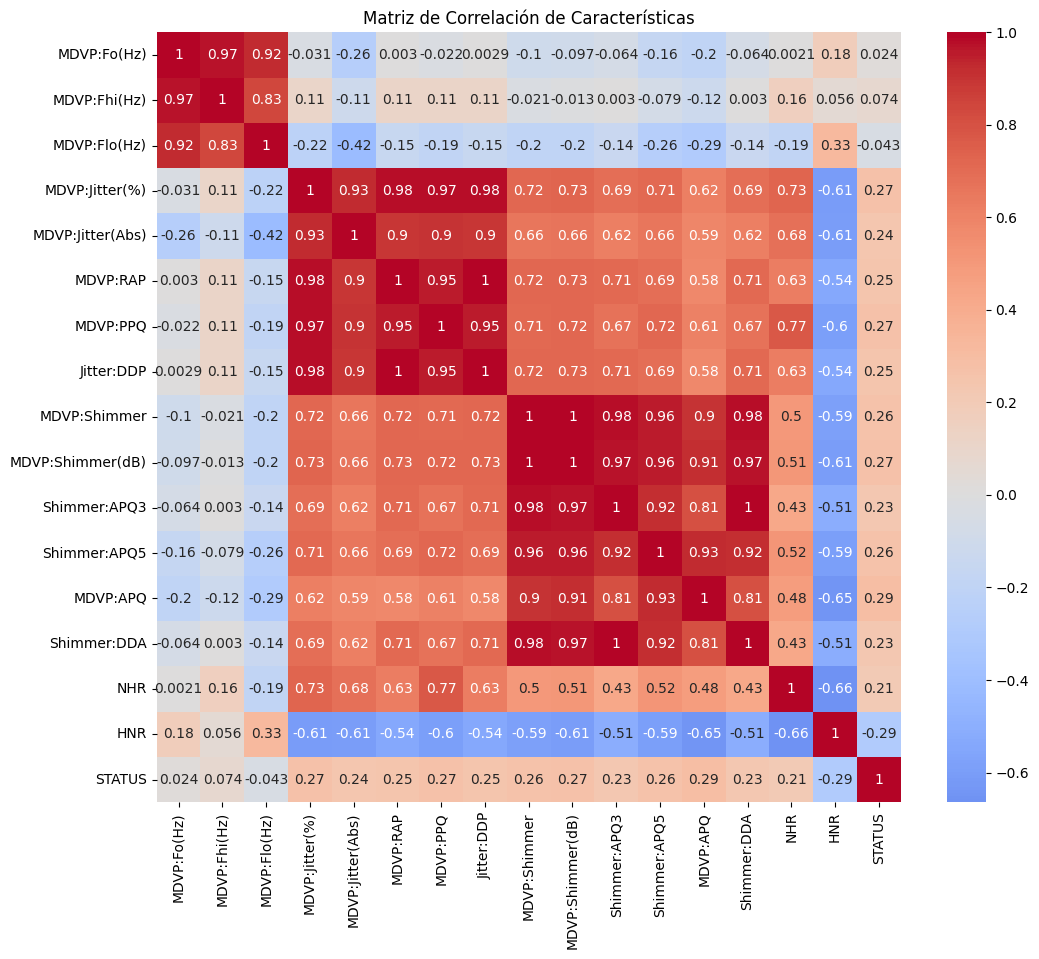

Características más correlacionadas con el objetivo:
MDVP:APQ            0.293692
HNR                 0.291815
MDVP:PPQ            0.270245
MDVP:Jitter(%)      0.267220
MDVP:Shimmer(dB)    0.265986
MDVP:Shimmer        0.264526
Shimmer:APQ5        0.261218
MDVP:RAP            0.246420
Jitter:DDP          0.246377
MDVP:Jitter(Abs)    0.236667
Name: STATUS, dtype: float64


In [ ]:
# Supongamos que df es tu DataFrame original con características y 'STATUS' como la variable objetivo
X = df.drop(columns=['STATUS'])  # Elimina 'STATUS' para la estandarización
y = df['STATUS']  # Guarda 'STATUS' por separado

# Crear un scaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

# Seleccionar solo características numéricas continuas para la estandarización
numerical_features = X.select_dtypes(include=['float64'])  # Selecciona solo columnas de tipo float64

# Aplicar el scaler a las características numéricas continuas
scaled_features = scaler.fit_transform(numerical_features)

# Crear un DataFrame con las características estandarizadas
X_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Añadir la columna de 'gender' y 'STATUS' al DataFrame estandarizado
X_scaled['STATUS'] = y.values

# Calcular la matriz de correlación
correlation_matrix = X_scaled.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características')
plt.show()

# Obtener la correlación de las características con la variable objetivo
correlation_with_target = correlation_matrix['STATUS'].abs().sort_values(ascending=False)

# Seleccionar las 10 características más correlacionadas con el objetivo
top_correlated_features = correlation_with_target[1:11]  # Excluir la correlación de 'STATUS' consigo mismo

# Imprimir las características más correlacionadas con el objetivo
print("Características más correlacionadas con el objetivo:")
print(top_correlated_features)



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

#Elimina la columna de STATUS ya que pertenece solo a 'y' y alimina las características menos relevantes para Matrix
X_ = df.drop(columns=['STATUS','MDVP:Fo(Hz)','MDVP:Fhi(Hz)','Shimmer:APQ3','Shimmer:DDA','NHR','MDVP:Flo(Hz)'])
y = df['STATUS']

X_Matrix = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
print('Dataset con las 10 primera características de χ²\n')
X_Matrix.head(10)

Dataset con las 10 primera características de χ²



,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,MDVP:APQ,HNR
0,0.012597,0.014421,0.012649,0.014327,0.012766,0.037492,0.036518,0.065691,0.058757,0.732356
1,0.012112,0.010562,0.011565,0.009824,0.011683,0.020942,0.019919,0.043073,0.031827,0.738968
2,0.063953,0.059384,0.029996,0.059763,0.030230,0.218661,0.222796,0.342674,0.556246,0.566287
3,0.119428,0.089857,0.104445,0.108473,0.104541,0.224494,0.223903,0.379927,0.372881,0.532263
4,0.077277,0.032264,0.076617,0.056897,0.076840,0.104218,0.102914,0.136288,0.135656,0.850709
5,0.058382,0.061937,0.042284,0.048711,0.042394,0.152886,0.161933,0.172875,0.436221,0.456760
6,0.048692,0.038120,0.043007,0.052395,0.043237,0.110478,0.108078,0.185764,0.148713,0.479807
7,0.036579,0.023213,0.021684,0.026607,0.021920,0.074853,0.083364,0.108515,0.144256,0.591174
8,0.018895,0.017563,0.020961,0.020876,0.020956,0.000000,0.000000,0.004989,0.000000,0.767597
9,0.040940,0.026242,0.036502,0.047892,0.036493,0.037525,0.036518,0.085980,0.065725,0.873912


##Clasificador Extra Trees

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crear y ajustar el clasificador Extra Trees
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled, y)

# Obtener la importancia de las características del clasificador Extra Trees
importancia = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia
importancia_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': importancia
}).sort_values(by='Importance', ascending=False)

print(importancia_df)

             Feature  Importance
16            STATUS    0.824460
7         Jitter:DDP    0.018202
12          MDVP:APQ    0.018007
8       MDVP:Shimmer    0.011985
15               HNR    0.011890
0        MDVP:Fo(Hz)    0.011674
3     MDVP:Jitter(%)    0.011594
13       Shimmer:DDA    0.011542
2       MDVP:Flo(Hz)    0.010857
5           MDVP:RAP    0.010295
10      Shimmer:APQ3    0.010099
9   MDVP:Shimmer(dB)    0.009730
6           MDVP:PPQ    0.009676
1       MDVP:Fhi(Hz)    0.008726
11      Shimmer:APQ5    0.008052
14               NHR    0.007932
4   MDVP:Jitter(Abs)    0.005279


Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 10}
             Feature  Importance
12          MDVP:APQ    0.086131
0        MDVP:Fo(Hz)    0.077685
1       MDVP:Fhi(Hz)    0.074667
9   MDVP:Shimmer(dB)    0.074167
15               HNR    0.067850
13       Shimmer:DDA    0.066561
2       MDVP:Flo(Hz)    0.064003
6           MDVP:PPQ    0.061344
14               NHR    0.060688
4   MDVP:Jitter(Abs)    0.058512
7         Jitter:DDP    0.058485
10      Shimmer:APQ3    0.057745
8       MDVP:Shimmer    0.053072
5           MDVP:RAP    0.053026
11      Shimmer:APQ5    0.046595
3     MDVP:Jitter(%)    0.039470


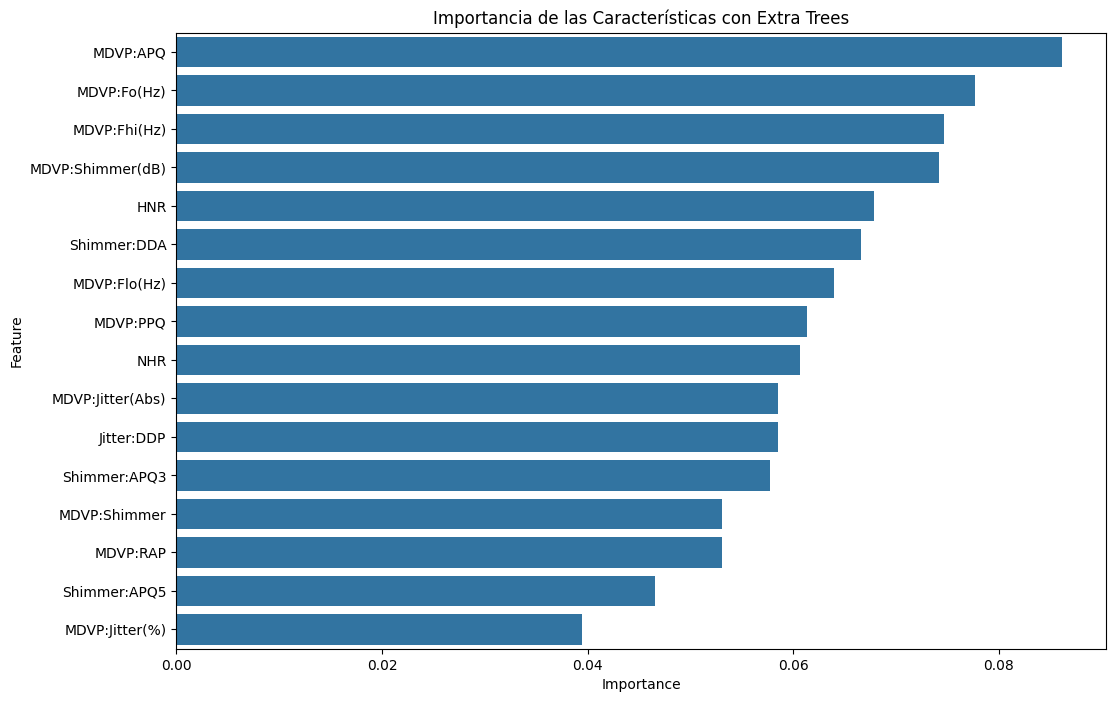

In [ ]:
# Supongamos que df es tu DataFrame original con características y 'STATUS' como la variable objetivo
X = df.drop(columns=['STATUS'])
y = df['STATUS']

# Crear un scaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

# Aplicar el scaler a todas las características numéricas excepto la columna 'gender'
numerical_features = X.select_dtypes(include=['float64'])
scaled_features = scaler.fit_transform(numerical_features)

# Crear un DataFrame con las características estandarizadas
X_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Configurar la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instanciar y ajustar la búsqueda en cuadrícula
grid = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f"Best parameters: {grid.best_params_}")

# Ajustar el clasificador con los mejores parámetros
best_clf = grid.best_estimator_

# Obtener la importancia de las características
importances = best_clf.feature_importances_

# Crear un DataFrame para visualizar la importancia
importancia_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importancia_df)

# Graficar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importancia_df)
plt.title('Importancia de las Características con Extra Trees')
plt.show()


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

#Elimina la columna de STATUS ya que pertenece solo a 'y' y alimina las características menos relevantes para Tree
X_ = df.drop(columns=['STATUS','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:Shimmer','Shimmer:APQ5','Shimmer:DDA','MDVP:Jitter(%)'])
y = df['STATUS']

X_Tree = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
print('Dataset con las 10 primera características de Tree\n')
X_Tree.head(10)

Dataset con las 10 primera características de Tree



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:PPQ,Jitter:DDP,MDVP:Shimmer(dB),Shimmer:APQ3,MDVP:APQ,NHR,HNR
0,0.335044,0.326367,0.432401,0.014327,0.012766,0.036518,0.042773,0.058757,0.005354,0.732356
1,0.454358,0.460245,0.512138,0.009824,0.011683,0.019919,0.029033,0.031827,0.002880,0.738968
2,0.245112,0.253252,0.348048,0.059763,0.030230,0.222796,0.144002,0.556246,0.015523,0.566287
3,0.329792,0.338057,0.406067,0.108473,0.104541,0.223903,0.193863,0.372881,0.029397,0.532263
4,0.782089,0.801032,0.812674,0.056897,0.076840,0.102914,0.104870,0.135656,0.001396,0.850709
5,0.183832,0.180782,0.297747,0.048711,0.042394,0.161933,0.070204,0.436221,0.037304,0.456760
6,0.357176,0.352398,0.446070,0.052395,0.043237,0.108078,0.103365,0.148713,0.022316,0.479807
7,0.501206,0.521016,0.476785,0.026607,0.021920,0.083364,0.051124,0.144256,0.015245,0.591174
8,0.369738,0.364465,0.462134,0.020876,0.020956,0.000000,0.010341,0.000000,0.003548,0.767597
9,0.488254,0.491919,0.553726,0.047892,0.036493,0.036518,0.034762,0.065725,0.001167,0.873912


#Modelos de Machine Learning

##Arreglo de datos

###Visualización de datos

In [ ]:
print('\nX_CHI2:\n',X_CHI2.info())
print('\nX_Matrix:\n',X_Matrix.info())
print('\nX_Tree: \n',X_Tree.info())
print('\ny: \n',y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Jitter(%)    300 non-null    float64
 1   MDVP:Jitter(Abs)  300 non-null    float64
 2   MDVP:RAP          300 non-null    float64
 3   MDVP:PPQ          300 non-null    float64
 4   Jitter:DDP        300 non-null    float64
 5   MDVP:Shimmer      300 non-null    float64
 6   MDVP:Shimmer(dB)  300 non-null    float64
 7   Shimmer:APQ5      300 non-null    float64
 8   MDVP:APQ          300 non-null    float64
 9   HNR               300 non-null    float64
dtypes: float64(10)
memory usage: 23.6 KB

X_CHI2:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Jitter(%)    300 non-null    float64
 1   MDVP:Jitter(Abs)  300 n

###División de Dataset

In [ ]:
X_train_CHI2, X_test_CHI2, y_train_CHI2, y_test_CHI2 = train_test_split(X_CHI2, y, test_size=0.20, random_state=42)
X_train_Matrix, X_test_Matrix, y_train_Matrix, y_test_Matrix = train_test_split(X_Matrix, y, test_size=0.20, random_state=42)
X_train_Tree, X_test_Tree, y_train_Tree, y_test_Tree = train_test_split(X_Tree, y, test_size=0.20, random_state=42)


##Árbol de Decisión

###χ²

In [ ]:
clfDTCHI2 = DecisionTreeClassifier()

In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [1,2,3],
    'criterion': ['gini', 'entropy'],
}
CV_dtCHI2 = GridSearchCV(estimator=clfDTCHI2, param_grid=param_grid, cv= 5)
CV_dtCHI2.fit(X_train_CHI2, y_train_CHI2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3]})

In [ ]:
CV_dtCHI2.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'random_state': 2}

In [ ]:
dt1CHI2=DecisionTreeClassifier(random_state=34, max_features='sqrt', max_depth=8, criterion='gini')
dt1CHI2.fit(X_train_CHI2, y_train_CHI2)
predDTCHI2 = dt1CHI2.predict(X_test_CHI2)
print(classification_report(y_test_CHI2, predDTCHI2))

# Realiza la validación cruzada K = 5
scoresdtCHI2 = cross_val_score(clfDTCHI2, X_CHI2, y, cv=5)  # Aquí X_features y y son tus características y etiquetas, respectivamente

# Imprime los resultados de la validación cruzada
print("Accuracy VC: %0.2f (+/- %0.2f)" % (scoresdtCHI2.mean(), scoresdtCHI2.std() * 2))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        31
           1       0.82      0.62      0.71        29

    accuracy                           0.75        60
   macro avg       0.76      0.75      0.74        60
weighted avg       0.76      0.75      0.75        60

Accuracy VC: 0.65 (+/- 0.10)


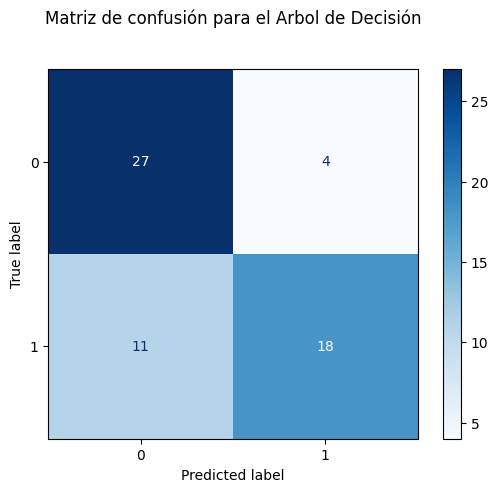

In [ ]:
#donde y_test_CHI2 son las etiquetas reales y predDtCHI2 represeta las preddiciones del modelo
cmDTCHI2 = ConfusionMatrixDisplay(confusion_matrix(y_test_CHI2, predDTCHI2))
cmDTCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para el Arbol de Decisión', y=1.1)
plt.show()

In [ ]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy_DTCHI2 = accuracy_score(y_train_CHI2, dt1CHI2.predict(X_train_CHI2))
test_accuracy_DTCHI2 = accuracy_score(y_test_CHI2, dt1CHI2.predict(X_test_CHI2))
# Imprimir los resultados
print("Precisión en el conjunto de entrenamiento:", train_accuracy_DTCHI2)
print("Precisión en el conjunto de prueba:", test_accuracy_DTCHI2)

Precisión en el conjunto de entrenamiento: 0.8791666666666667
Precisión en el conjunto de prueba: 0.75


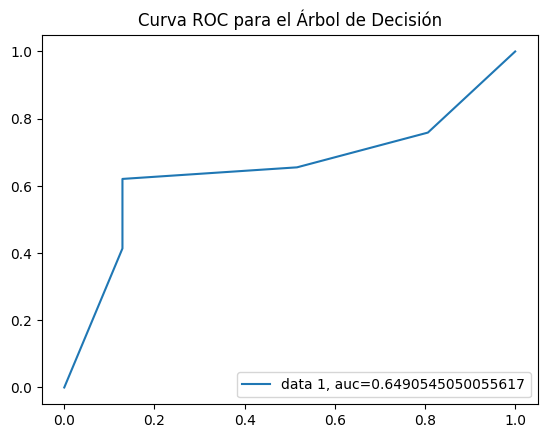

In [ ]:
# Calcula las probabilidades de las clases positivas
y_pred_probaDTCHI2 = dt1CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcula la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr)
fpr_DTCHI2, tpr_DTCHI2, _ = roc_curve(y_test_CHI2, y_pred_probaDTCHI2)

# Calcula el área bajo la curva ROC (AUC)
auc_DTCHI2 = roc_auc_score(y_test_CHI2, y_pred_probaDTCHI2)

# Grafica la curva ROC
plt.plot(fpr_DTCHI2, tpr_DTCHI2, label="data 1, auc=" + str(auc_DTCHI2))
plt.legend(loc=4)
plt.title('Curva ROC para el Árbol de Decisión')
plt.show()


In [ ]:
# Calcular e imprimir las métricas en el conjunto de prueba
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test_CHI2, predDTCHI2))

# Calcular la precisión en el conjunto de prueba
test_accuracy_DTCHI2 = accuracy_score(y_test_CHI2, predDTCHI2)
print("Precisión en el conjunto de prueba: %0.2f" % test_accuracy_DTCHI2)

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        31
           1       0.82      0.62      0.71        29

    accuracy                           0.75        60
   macro avg       0.76      0.75      0.74        60
weighted avg       0.76      0.75      0.75        60

Precisión en el conjunto de prueba: 0.75


In [ ]:
# Dumping Decision Tree Classifier
joblib.dump(predDTCHI2, 'dtCHI2_clf.pkl')

['dtCHI2_clf.pkl']

###Matrix

In [ ]:
clfDTMatrix = DecisionTreeClassifier()

In [ ]:
clfDTMatrix.fit(X_train_Matrix, y_train_Matrix)
predDTMatrix = clfDTMatrix.predict(X_test_Matrix)
print(classification_report(y_test_Matrix, predDTMatrix))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        31
           1       0.69      0.69      0.69        29

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [1,2,3],
    'criterion': ['gini', 'entropy'],
    }
CV_dtMatrix = GridSearchCV(estimator=clfDTMatrix, param_grid=param_grid, cv= 5)
CV_dtMatrix.fit(X_train_Matrix, y_train_Matrix)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3]})

In [ ]:
CV_dtMatrix.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'random_state': 2}

In [ ]:
dt1Matrix=DecisionTreeClassifier(random_state=34, max_features='sqrt', max_depth=8, criterion='gini')
dt1Matrix.fit(X_train_Matrix, y_train_Matrix)
predDTMatrix = dt1Matrix.predict(X_test_Matrix)
print(classification_report(y_test_Matrix, predDTMatrix))

# Realiza la validación cruzada
scoresdtMatrix = cross_val_score(clfDTMatrix, X_Matrix, y, cv=5)  # Aquí X_features y y son tus características y etiquetas, respectivamente

# Imprime los resultados de la validación cruzada
print("Accuracy VC: %0.2f (+/- %0.2f)" % (scoresdtMatrix.mean(), scoresdtMatrix.std() * 2))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        31
           1       0.82      0.62      0.71        29

    accuracy                           0.75        60
   macro avg       0.76      0.75      0.74        60
weighted avg       0.76      0.75      0.75        60

Accuracy VC: 0.64 (+/- 0.09)


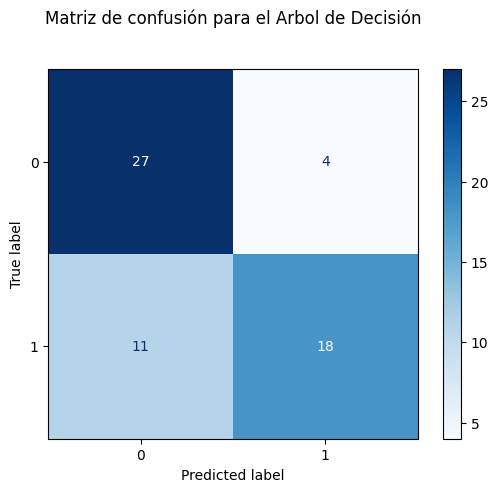

In [ ]:
#donde y_test_CHI2 son las etiquetas reales y predDtCHI2 represeta las preddiciones del modelo
cm_DTMatrix = ConfusionMatrixDisplay(confusion_matrix(y_test_Matrix, predDTMatrix))
cm_DTMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para el Arbol de Decisión', y=1.1)
plt.show()

In [ ]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy_DTMatrix = accuracy_score(y_train_Matrix, dt1Matrix.predict(X_train_Matrix))
test_accuracy_DTMatrix = accuracy_score(y_test_Matrix, dt1Matrix.predict(X_test_Matrix))
# Imprimir los resultados
print("Precisión en el conjunto de entrenamiento:", train_accuracy_DTMatrix)
print("Precisión en el conjunto de prueba:", test_accuracy_DTMatrix)

Precisión en el conjunto de entrenamiento: 0.8791666666666667
Precisión en el conjunto de prueba: 0.75


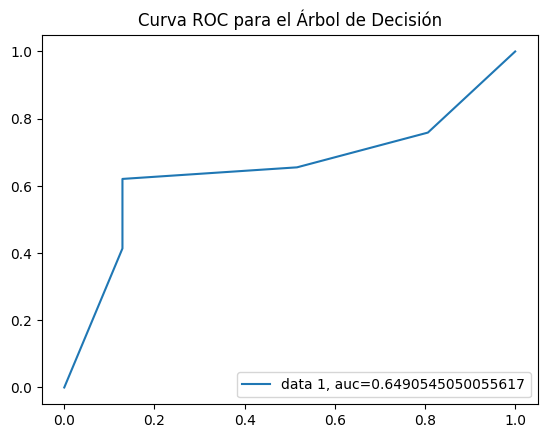

In [ ]:
# Calcula las probabilidades de las clases positivas
y_pred_proba_DTMatrix = dt1Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcula la tasa de falsos positivos (fprMatrix) y la tasa de verdaderos positivos (tprMatrix)
fprDTMatrix, tprDTMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_DTMatrix)

# Calcula el área bajo la curva ROC (AUC)
aucDTMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_DTMatrix)

# Grafica la curva ROC
plt.plot(fprDTMatrix, tprDTMatrix, label="data 1, auc=" + str(aucDTMatrix))
plt.legend(loc=4)
plt.title('Curva ROC para el Árbol de Decisión')
plt.show()


In [ ]:
# Dumping Decision Tree Classifier
joblib.dump(predDTMatrix, 'dtMatrix_clf.pkl')

['dtMatrix_clf.pkl']

###Trees

In [ ]:
clfDTTree = DecisionTreeClassifier()
clfDTTree.fit(X_train_Tree, y_train_Tree)
predDTTree = clfDTTree.predict(X_test_Tree)
print(classification_report(y_test_Tree, predDTTree))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.77      0.79      0.78        29

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [1,2,3],
    'criterion': ['gini', 'entropy'],
    }
CV_dtTree = GridSearchCV(estimator=clfDTTree, param_grid=param_grid, cv= 5)
CV_dtTree.fit(X_train_Tree, y_train_Tree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3]})

In [ ]:
CV_dtTree.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'random_state': 3}

In [ ]:
dt1Tree=DecisionTreeClassifier(random_state=34, max_features='sqrt', max_depth=8, criterion='gini')
dt1Tree.fit(X_train_Tree, y_train_Tree)
predDTTree = dt1Tree.predict(X_test_Tree)
print(classification_report(y_test_Tree, predDTTree))

# Realiza la validación cruzada
scores_DTTree = cross_val_score(clfDTTree, X_Tree, y, cv=5)  # Aquí X_features y y son tus características y etiquetas, respectivamente

# Imprime los resultados de la validación cruzada
print("Accuracy VC: %0.2f (+/- %0.2f)" % (scores_DTTree.mean(), scores_DTTree.std() * 2))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.77      0.83      0.80        29

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Accuracy VC: 0.67 (+/- 0.19)


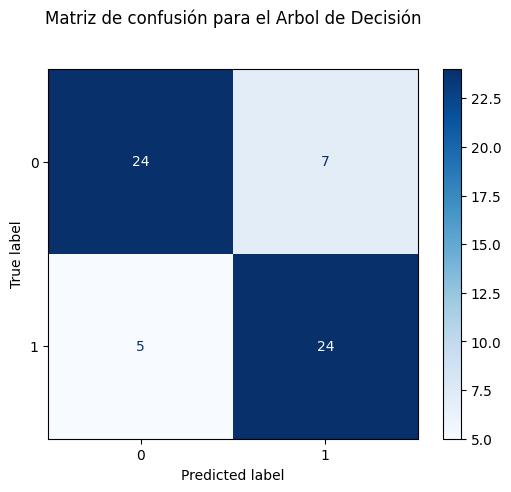

In [ ]:
#donde y_test_CHI2 son las etiquetas reales y predDtCHI2 represeta las preddiciones del modelo
cm_DTTree = ConfusionMatrixDisplay(confusion_matrix(y_test_Tree, predDTTree))
cm_DTTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para el Arbol de Decisión', y=1.1)
plt.show()

In [ ]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy_DTTree = accuracy_score(y_train_Tree, dt1Tree.predict(X_train_Tree))
test_accuracy_DTTree = accuracy_score(y_test_Tree, dt1Tree.predict(X_test_Tree))
# Imprimir los resultados
print("Precisión en el conjunto de entrenamiento:", train_accuracy_DTTree)
print("Precisión en el conjunto de prueba:", test_accuracy_DTTree)

Precisión en el conjunto de entrenamiento: 0.975
Precisión en el conjunto de prueba: 0.8


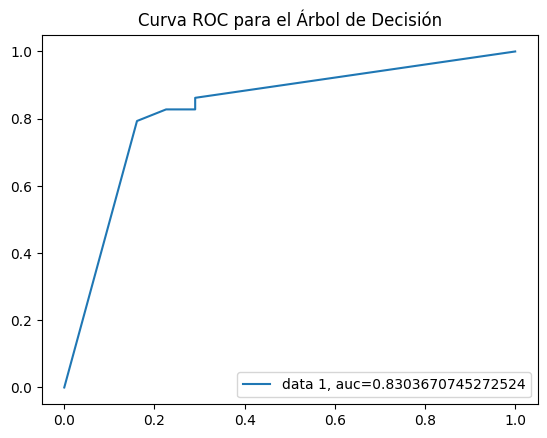

In [ ]:
# Calcula las probabilidades de las clases positivas
y_pred_proba_DTTree = dt1Tree.predict_proba(X_test_Tree)[:, 1]

# Calcula la tasa de falsos positivos (fprTree) y la tasa de verdaderos positivos (tprTree)
fprDTTree, tprDTTree, _ = roc_curve(y_test_Tree, y_pred_proba_DTTree)

# Calcula el área bajo la curva ROC (AUC)
aucDTTree = roc_auc_score(y_test_Tree, y_pred_proba_DTTree)

# Grafica la curva ROC
plt.plot(fprDTTree, tprDTTree, label="data 1, auc=" + str(aucDTTree))
plt.legend(loc=4)
plt.title('Curva ROC para el Árbol de Decisión')
plt.show()


In [ ]:
# Dumping Decision Tree Classifier
joblib.dump(predDTTree, 'dtTree_clf.pkl')

['dtTree_clf.pkl']

##KNN -K Vecinos más Cercanos

###χ²

In [ ]:
# Definir los hiperparámetros de forma manual
knn_CHI2 = KNeighborsClassifier(n_neighbors=29, weights='distance')  #{'distance', 'uniform'} Aquí puedes cambiar los valores manualmente

# Validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(knn_CHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')  # 10 pliegues
cv_score_mean = cv_scores.mean()

print(f"Puntuación media de validación cruzada: {cv_score_mean:.4f}")
#print(f"Puntuaciones de validación cruzada para cada pliegue: {cv_scores}")

# Entrenar el modelo con los hiperparámetros definidos
knn_CHI2.fit(X_train_CHI2, y_train_CHI2)

Puntuación media de validación cruzada: 0.6250


KNeighborsClassifier(n_neighbors=29, weights='distance')

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_knn_CHI2 = knn_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
knn_train_acc_CHI2 = knn_CHI2.score(X_train_CHI2, y_train_CHI2)
knn_test_acc_CHI2 = knn_CHI2.score(X_test_CHI2, y_test_CHI2)

# Imprimir resultados
print(f"Precisión en el conjunto de entrenamiento: {knn_train_acc_CHI2:.4f}")
print(f"Precisión en el conjunto de prueba: {knn_test_acc_CHI2:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.7333


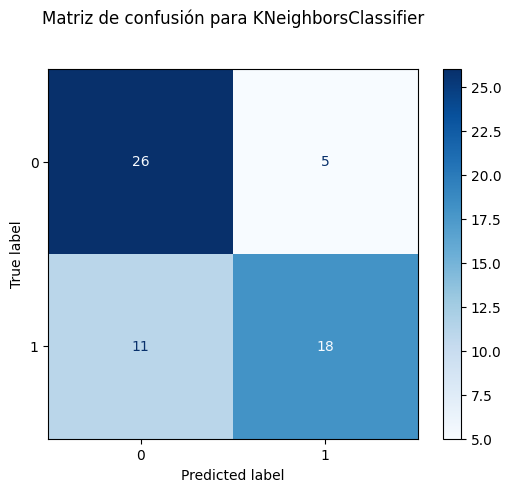


Informe de Clasificación en el Conjunto de Prueba:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        31
           1       0.78      0.62      0.69        29

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_KNNCHI2 = confusion_matrix(y_test_CHI2, pred_knn_CHI2)
disp_KNNCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_KNNCHI2)
disp_KNNCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para KNeighborsClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nInforme de Clasificación en el Conjunto de Prueba:\n", classification_report(y_test_CHI2, pred_knn_CHI2))

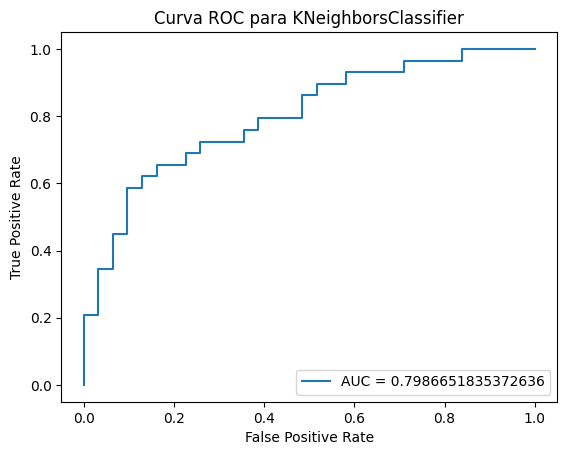

AUC: 0.7987


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_KNNCHI2 = knn_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos para la curva ROC
fpr_KNNCHI2, tpr_KNNCHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_KNNCHI2)
auc_KNNCHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_KNNCHI2)

# Visualización de la curva ROC
plt.figure()
plt.plot(fpr_KNNCHI2, tpr_KNNCHI2, label="AUC = " + str(auc_KNNCHI2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_KNNCHI2:.4f}")

In [ ]:
# Guardar el modelo KNeighborsClassifier entrenado en un archivo .pkl
joblib.dump(knn_CHI2, 'knnCHI2_clf.pkl')

['knnCHI2_clf.pkl']

###Matriz

In [ ]:
# Definir manualmente los hiperparámetros seleccionados
knn_Matrix = KNeighborsClassifier(n_neighbors=29, weights='distance')  # Ajusta estos valores manualmente

# Validación cruzada en el conjunto de entrenamiento
cv_scores_Matrix = cross_val_score(knn_Matrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')  # 10 pliegues de validación cruzada
cv_mean_score_Matrix = cv_scores_Matrix.mean()

print(f"Puntuación media de validación cruzada: {cv_mean_score_Matrix:.4f}")

# Entrenar el modelo en el conjunto de entrenamiento
knn_Matrix.fit(X_train_Matrix, y_train_Matrix)

Puntuación media de validación cruzada: 0.6250


KNeighborsClassifier(n_neighbors=29, weights='distance')

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_knn_Matrix = knn_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
knn_train_acc_Matrix = knn_Matrix.score(X_train_Matrix, y_train_Matrix)
knn_test_acc_Matrix = knn_Matrix.score(X_test_Matrix,  y_test_Matrix)

# Imprimir resultados
print(f"Precisión en el conjunto de entrenamiento: {knn_train_acc_Matrix:.4f}")
print(f"Precisión en el conjunto de prueba: {knn_test_acc_Matrix:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.7333


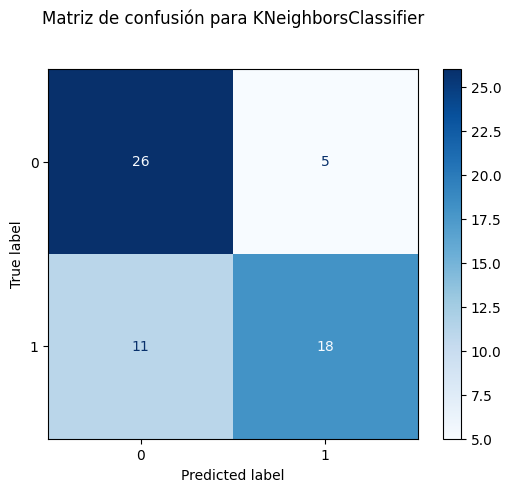


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        31
           1       0.78      0.62      0.69        29

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_KNNMatrix = confusion_matrix(y_test_Matrix, pred_knn_Matrix)
disp_KNNMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_KNNMatrix)
disp_KNNMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para KNeighborsClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_knn_Matrix))

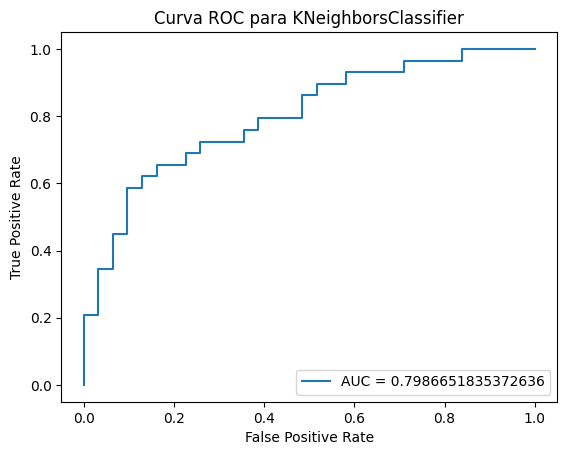

AUC: 0.7987


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_KNNMatrix = knn_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos para la curva ROC
fpr_KNNMatrix, tpr_KNNMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_KNNMatrix)
auc_KNNMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_KNNMatrix)

# Visualización de la curva ROC
plt.plot(fpr_KNNMatrix, tpr_KNNMatrix, label="AUC = " + str(auc_KNNMatrix))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_KNNMatrix:.4f}")

In [ ]:
# Dumping KNN Classifier
joblib.dump(pred_knn_Matrix, 'knnMatrix_clf.pkl')

['knnMatrix_clf.pkl']

###Tree

In [ ]:
# Definir el modelo KNeighborsClassifier con los hiperparámetros manuales
knn_Tree = KNeighborsClassifier(n_neighbors=9, weights='distance')  # Ajusta los hiperparámetros manualmente

# Validación cruzada en el conjunto de entrenamiento
cv_scores_Tree = cross_val_score(knn_Tree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_Tree = cv_scores_Tree.mean()

print(f"Puntuación media de validación cruzada: {cv_mean_score_Tree:.4f}")

# Entrenar el modelo con los datos de entrenamiento
knn_Tree.fit(X_train_Tree, y_train_Tree)

Puntuación media de validación cruzada: 0.6875


KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_knn_Tree = knn_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
knn_train_acc_Tree = knn_Tree.score(X_train_Tree, y_train_Tree)
knn_test_acc_Tree = knn_Tree.score(X_test_Tree, y_test_Tree)

# Imprimir resultados
print(f"Precisión en el conjunto de entrenamiento: {knn_train_acc_Tree:.4f}")
print(f"Precisión en el conjunto de prueba: {knn_test_acc_Tree:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8000


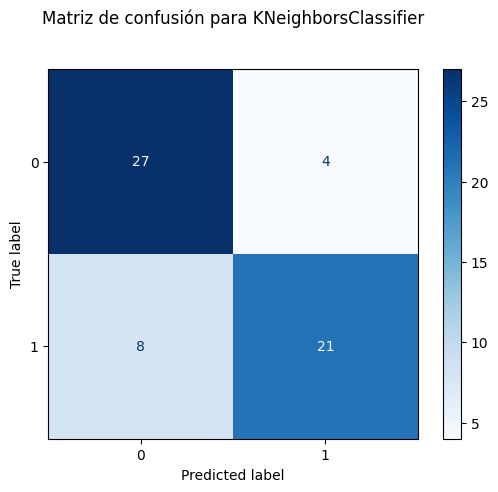


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.84      0.72      0.78        29

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_KNNTree = confusion_matrix(y_test_Tree, pred_knn_Tree)
disp_KNNTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_KNNTree)
disp_KNNTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para KNeighborsClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_knn_Tree))


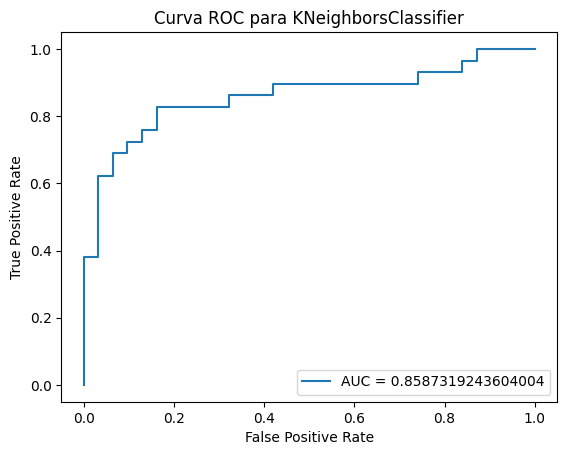

AUC: 0.8587


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_KNNTree = knn_Tree.predict_proba(X_test_Tree)[:, 1]  # Utiliza el modelo entrenado (no best_estimator)

# Calcular la curva ROC y el AUC
fpr_KNNTree, tpr_KNNTree, _ = roc_curve(y_test_Tree, y_pred_proba_KNNTree)
auc_KNNTree = roc_auc_score(y_test_Tree, y_pred_proba_KNNTree)

# Visualización de la curva ROC
plt.plot(fpr_KNNTree, tpr_KNNTree, label="AUC = " + str(auc_KNNTree))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_KNNTree:.4f}")

In [ ]:
# Dumping KNN Classifier
joblib.dump(pred_knn_Tree, 'knnTree_clf.pkl')

['knnTree_clf.pkl']

##Random Forest

###χ²

In [ ]:
rfCHI2 = RandomForestClassifier(random_state=42)

In [ ]:
param_distributions_RFCHI2 = {
    'n_estimators': [1,2,3],  # Número de árboles
    'max_depth': [1,2,3],   # Profundidad máxima del árbol
    'min_samples_split': [1,2,3],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1,2,3],             # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],  # Número de características a considerar para la mejor división
    'bootstrap': [True, False],                # Si usar o no muestreo con reemplazo
    'criterion': ['gini', 'entropy', 'log_loss']           # Función de medición de la calidad de una división
}

# Configurar RandomizedSearchCV para buscar los mejores hiperparámetros
random_search_rfCHI2 = RandomizedSearchCV(
    estimator = rfCHI2,
    param_distributions = param_distributions_RFCHI2,
    n_iter = 20,  # Número de configuraciones diferentes para probar
    scoring ='accuracy',
    cv=10,  # Validación cruzada de 10 pliegues
    verbose = 1,
    n_jobs = -1  # Usar todos los núcleos disponibles
)

# Entrenar RandomizedSearchCV
random_search_rfCHI2.fit(X_train_CHI2, y_train_CHI2)

print("Mejores parámetros encontrados:")
print(random_search_rfCHI2.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores parámetros encontrados:
{'n_estimators': 3, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 1, 'criterion': 'entropy', 'bootstrap': True}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [ ]:
# Definir el modelo RandomForestClassifier con hiperparámetros manuales
rfCHI2 = RandomForestClassifier(
    n_estimators=200,            # Número de árboles en el bosque
    max_depth=10,               # Profundidad máxima del árbol
    min_samples_split=10,        # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,         # Mínimo de muestras en una hoja
    max_features='log2',        # {'log2', 'sqrt'}Número de características a considerar para la mejor división
    bootstrap=False,            # Uso de muestreo con reemplazo
    criterion='gini',        # {'gini', 'entropy', 'log_loss'} Función de calidad de la división
    random_state=42             # Fijar la semilla para reproducibilidad
)

# Entrenar el modelo en el conjunto de entrenamiento
rfCHI2.fit(X_train_CHI2, y_train_CHI2)

# Realizar predicciones en el conjunto de prueba
pred_rf_CHI2 = rfCHI2.predict(X_test_CHI2)

# Evaluar la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = rfCHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = rfCHI2.score(X_test_CHI2, y_test_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_rfCHI2 = cross_val_score(rfCHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')
cv_mean_score_rfCHI2 = cv_scores_rfCHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_rfCHI2:.4f}")

Precisión en el conjunto de entrenamiento: 0.9708
Precisión en el conjunto de prueba: 0.7833
Precisión promedio de validación cruzada (10 pliegues): 0.6167


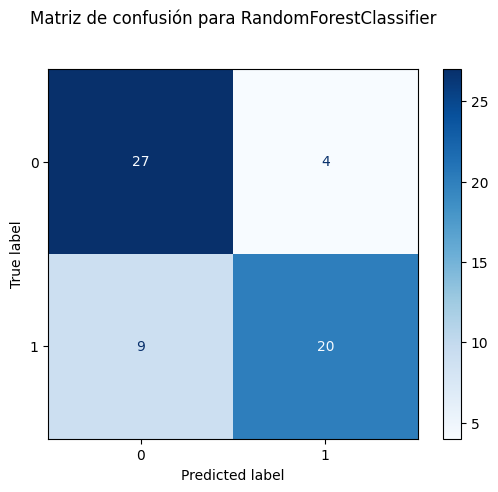


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        31
           1       0.83      0.69      0.75        29

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_RFCHI2 = confusion_matrix(y_test_CHI2, pred_rf_CHI2)
disp_RFCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_RFCHI2)
disp_RFCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para RandomForestClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_rf_CHI2))

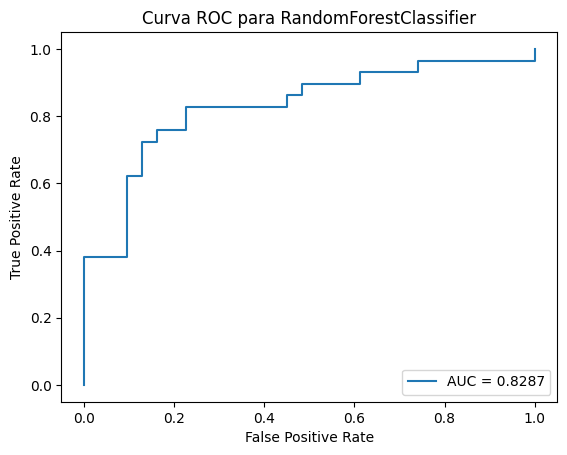

AUC: 0.8287


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_rfCHI2 = rfCHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_RF_CHI2, tpr_RF_CHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_rfCHI2)
auc_RF_CHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_rfCHI2)

# Visualización de la curva ROC
plt.plot(fpr_RF_CHI2, tpr_RF_CHI2, label="AUC = " + str(round(auc_RF_CHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_RF_CHI2:.4f}")



In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_rf_CHI2, 'rfCHI2_clf.pkl')

['rfCHI2_clf.pkl']

###Matrix

In [ ]:
# Definir el modelo RandomForestClassifier con hiperparámetros manuales
rfMatrix = RandomForestClassifier(
    n_estimators=400,            # Número de árboles en el bosque
    max_depth=10,               # Profundidad máxima del árbol
    min_samples_split=10,        # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,         # Mínimo de muestras en una hoja
    max_features='log2',        # {'log2', 'sqrt'}Número de características a considerar para la mejor división
    bootstrap=False,            # Uso de muestreo con reemplazo
    criterion='gini',        # {'gini', 'entropy', 'log_loss'} Función de calidad de la división
    random_state=42             # Fijar la semilla para reproducibilidad
)

# Entrenar el modelo en el conjunto de entrenamiento
rfMatrix.fit(X_train_Matrix, y_train_Matrix)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_rf_Matrix = rfMatrix.predict(X_test_Matrix)

# Evaluar la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = rfMatrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_rf_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_rfMatrix = cross_val_score(rfMatrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')
cv_mean_score_rfMatrix = cv_scores_rfMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_rfMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 0.9792
Precisión en el conjunto de prueba: 0.8000
Precisión promedio de validación cruzada (10 pliegues): 0.6042


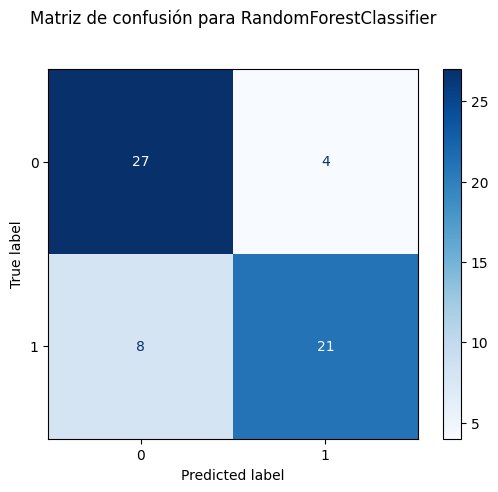


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.84      0.72      0.78        29

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_RFMatrix = confusion_matrix(y_test_Matrix, pred_rf_Matrix)
disp_RFMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_RFMatrix)
disp_RFMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para RandomForestClassifier', y=1.1)
plt.show()


# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_rf_Matrix))


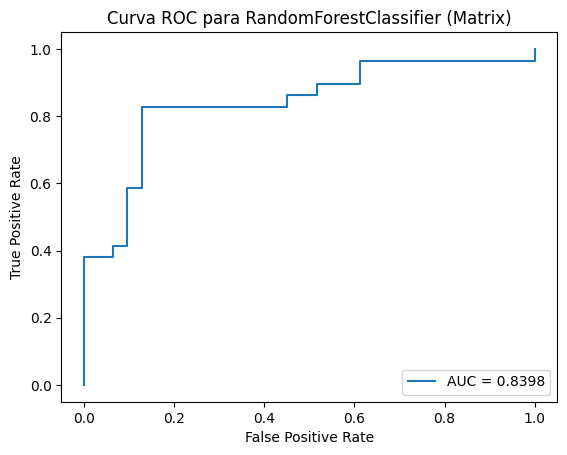

AUC: 0.8398


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_rfMatrix = rfMatrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_rfMatrix, tpr_rfMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_rfMatrix)
auc_rfMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_rfMatrix)

# Visualización de la curva ROC
plt.plot(fpr_rfMatrix, tpr_rfMatrix, label="AUC = " + str(round(auc_rfMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para RandomForestClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_rfMatrix:.4f}")


In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_rf_Matrix, 'rfMatrix_clf.pkl')

['rfMatrix_clf.pkl']

###Trees

In [ ]:
# Definir el modelo RandomForestClassifier con hiperparámetros manuales
rfTree = RandomForestClassifier(
    n_estimators=100,            # Número de árboles en el bosque
    max_depth=30,               # Profundidad máxima del árbol
    min_samples_split=10,        # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,         # Mínimo de muestras en una hoja
    max_features='log2',        # {'log2', 'sqrt'}Número de características a considerar para la mejor división
    bootstrap=True,            # Uso de muestreo con reemplazo
    criterion='gini',        # {'gini', 'entropy', 'log_loss'} Función de calidad de la división
    random_state=42             # Fijar la semilla para reproducibilidad
)

# Entrenar el modelo en el conjunto de entrenamiento
rfTree.fit(X_train_Tree, y_train_Tree)

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_rf_Tree = rfTree.predict(X_test_Tree)

# Evaluar la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = rfTree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_rf_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_rfTree = cross_val_score(rfTree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_rfTree = cv_scores_rfTree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_rfTree:.4f}")

Precisión en el conjunto de entrenamiento: 0.9667
Precisión en el conjunto de prueba: 0.8000
Precisión promedio de validación cruzada (10 pliegues): 0.6875


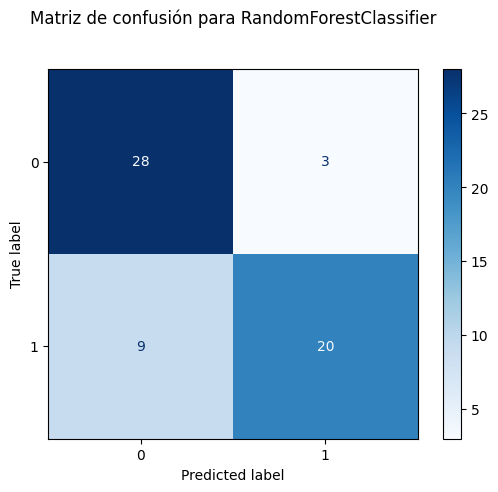


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        31
           1       0.87      0.69      0.77        29

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_RFTree = confusion_matrix(y_test_Tree, pred_rf_Tree)
disp_RFTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_RFTree)
disp_RFTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para RandomForestClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_rf_Tree))


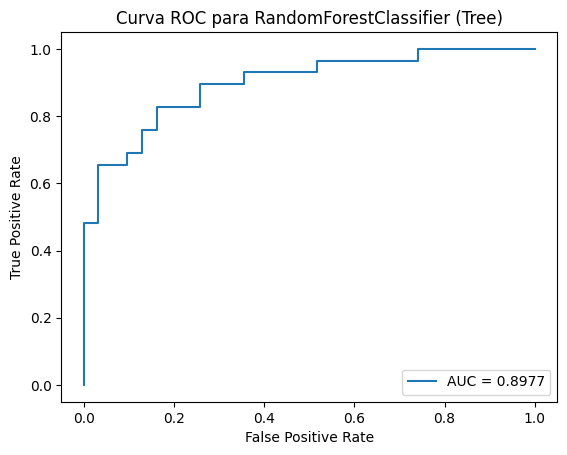

AUC: 0.8977


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_rfTree = rfTree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_rfTree, tpr_rfTree, _ = roc_curve(y_test_Tree, y_pred_proba_rfTree)
auc_rfTree = roc_auc_score(y_test_Tree, y_pred_proba_rfTree)

# Visualización de la curva ROC
plt.plot(fpr_rfTree, tpr_rfTree, label="AUC = " + str(round(auc_rfTree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para RandomForestClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_rfTree:.4f}")


In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_rf_Tree , 'rfTree_clf.pkl')

['rfTree_clf.pkl']


##Bagging

###χ²

In [ ]:
# Definir el clasificador base
DT_Regularized_BAGCHI2 = DecisionTreeClassifier(random_state=1)

# Definir el BaggingClassifier
bagging_clf_CHI2 = BaggingClassifier(estimator=DT_Regularized_BAGCHI2, random_state=42)

# Definir los hiperparámetros a explorar
param_distributions_BAGCHI2 = {
    'n_estimators': [10],
    'max_samples': [0.05],
    'max_features': [0.75],
    'bootstrap': [True, False],
    'estimator__max_depth': [1],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__min_samples_leaf':[1]
}

# Definir el GridSearchCV
random_search_BAGCHI2 = GridSearchCV(estimator=bagging_clf_CHI2, param_grid=param_distributions_BAGCHI2, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento
# This is the line that is missing
random_search_BAGCHI2.fit(X_train_CHI2, y_train_CHI2) # Replace X_train and y_train with your actual training data

# Obtener los mejores hiperparámetros y el modelo
best_params = random_search_BAGCHI2.best_params_
best_bagging_clf = random_search_BAGCHI2.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_params)

# Evaluar el modelo ajustado con los mejores hiperparámetros en el conjunto de prueba
test_accuracy_BagCHI2 = best_bagging_clf.score(X_test_CHI2, y_test_CHI2)
print(f"Precisión en el conjunto de prueba con el mejor modelo: {test_accuracy_BagCHI2:.4f}")

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Mejores hiperparámetros encontrados: {'bootstrap': False, 'estimator__criterion': 'gini', 'estimator__max_depth': 1, 'estimator__min_samples_leaf': 1, 'max_features': 0.75, 'max_samples': 0.05, 'n_estimators': 10}
Precisión en el conjunto de prueba con el mejor modelo: 0.7667


In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
DT_Regularized_BAGCHI2 = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,            # Semilla de aleatoriedad
    max_depth=1,                # Profundidad máxima del árbol
    min_samples_leaf=1          # Mínimo de muestras en una hoja
)

# Definir el BaggingClassifier con hiperparámetros específicos
bagging_clf_CHI2 = BaggingClassifier(
    estimator=DT_Regularized_BAGCHI2,
    n_estimators=6,           # Número de modelos en el conjunto
    max_samples=0.24,           # Proporción de muestras a utilizar
    max_features=0.6,          # Proporción de características a utilizar
    bootstrap=True,             # Si usar o no muestreo con reemplazo
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo BaggingClassifier en el conjunto de entrenamiento
bagging_clf_CHI2.fit(X_train_CHI2, y_train_CHI2)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                   random_state=42),
                  max_features=0.6, max_samples=0.24, n_estimators=6,
                  random_state=42)

In [ ]:
1# Realizar predicciones en el conjunto de prueba
pred_bagging_CHI2 = bagging_clf_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = bagging_clf_CHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = accuracy_score(y_test_CHI2, pred_bagging_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_BAGCHI2 = cross_val_score(bagging_clf_CHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')
cv_mean_score_BAGCHI2 = cv_scores_BAGCHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_BAGCHI2:.4f}")

Precisión en el conjunto de entrenamiento: 0.6333
Precisión en el conjunto de prueba: 0.7667
Precisión promedio de validación cruzada (10 pliegues): 0.6625


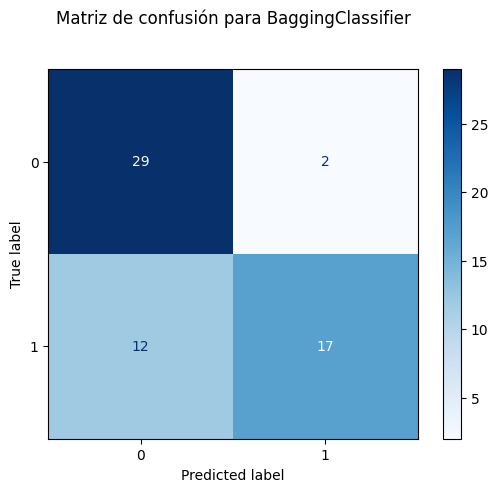


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81        31
           1       0.89      0.59      0.71        29

    accuracy                           0.77        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.80      0.77      0.76        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_BAGCHI2 = confusion_matrix(y_test_CHI2, pred_bagging_CHI2)
disp_BAGCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_BAGCHI2)
disp_BAGCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para BaggingClassifier', y=1.1)
plt.savefig('confusion_matrix.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_bagging_CHI2))

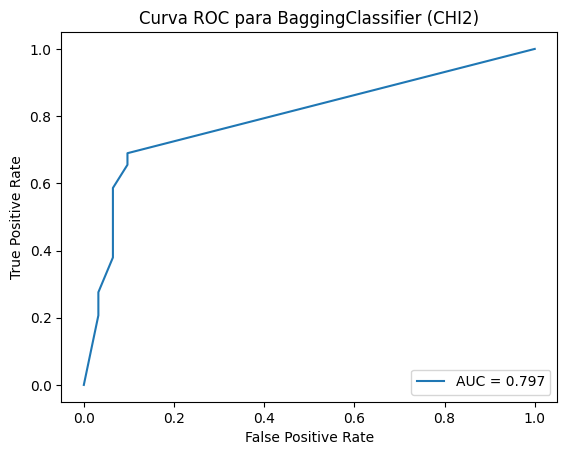

AUC: 0.7970


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_BAGCHI2 = bagging_clf_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_BAGCHI2, tpr_BAGCHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_BAGCHI2)
auc_BAGCHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_BAGCHI2)

# Visualización de la curva ROC
plt.plot(fpr_BAGCHI2, tpr_BAGCHI2, label="AUC = " + str(round(auc_BAGCHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para BaggingClassifier (CHI2)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_BAGCHI2:.4f}")



In [ ]:
# Guardar el modelo
joblib.dump(pred_bagging_CHI2, 'best_bagging_clf_CHI2.pkl')

['best_bagging_clf_CHI2.pkl']

###Matrix

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
DT_Regularized_BAGMatrix = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,            # Semilla de aleatoriedad
    max_depth=1,                # Profundidad máxima del árbol
    min_samples_leaf=1          # Mínimo de muestras en una hoja
)

# Definir el BaggingClassifier con hiperparámetros específicos
bagging_clf_Matrix = BaggingClassifier(
    estimator=DT_Regularized_BAGMatrix,
    n_estimators=6,           # Número de modelos en el conjunto
    max_samples=0.24,           # Proporción de muestras a utilizar
    max_features=0.6,          # Proporción de características a utilizar
    bootstrap=True,             # Si usar o no muestreo con reemplazo
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo BaggingClassifier en el conjunto de entrenamiento
bagging_clf_Matrix.fit(X_train_Matrix, y_train_Matrix)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                   random_state=42),
                  max_features=0.6, max_samples=0.24, n_estimators=6,
                  random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_bagging_Matrix = bagging_clf_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = bagging_clf_Matrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_bagging_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_BAGMatrix = cross_val_score(bagging_clf_Matrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')
cv_mean_score_BAGMatrix = cv_scores_BAGMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_BAGMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 0.6333
Precisión en el conjunto de prueba: 0.7667
Precisión promedio de validación cruzada (10 pliegues): 0.6625


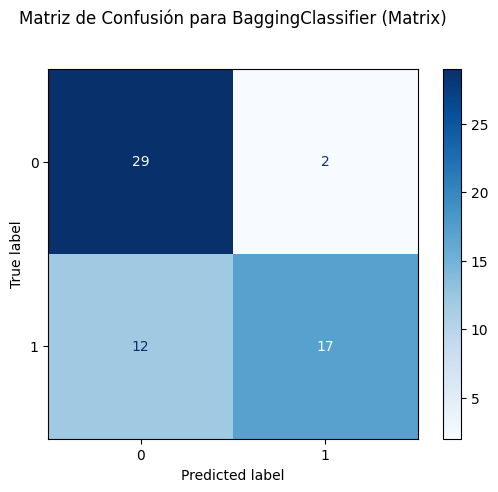


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81        31
           1       0.89      0.59      0.71        29

    accuracy                           0.77        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.80      0.77      0.76        60



In [ ]:
conf_matrix_BAGMatrix = confusion_matrix(y_test_Matrix, pred_bagging_Matrix)
disp_BAGMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_BAGMatrix)
disp_BAGMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para BaggingClassifier (Matrix)', y=1.1)
plt.savefig('confusion_matrix_BAGMatrix.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_bagging_Matrix))


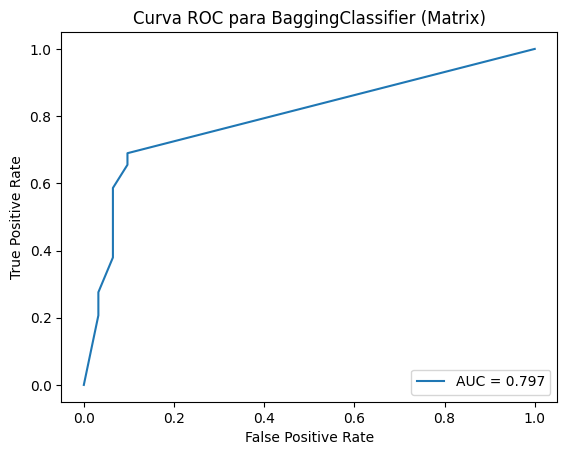

AUC: 0.7970


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_BAGMatrix = bagging_clf_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_BAGMatrix, tpr_BAGMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_BAGMatrix)
auc_BAGMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_BAGMatrix)

# Visualización de la curva ROC
plt.plot(fpr_BAGMatrix, tpr_BAGMatrix, label="AUC = " + str(round(auc_BAGMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para BaggingClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_BAGMatrix:.4f}")


In [ ]:
# Guardar el modelo
joblib.dump(pred_bagging_Matrix, 'best_bagging_clf_Matrix.pkl')

['best_bagging_clf_Matrix.pkl']

###Tree

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
DT_Regularized_BAGTree = DecisionTreeClassifier(
    criterion='gini',        # gini  entropy Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=8,                # Profundidad máxima del árbol
    min_samples_leaf=1          # Mínimo de muestras en una hoja
)

# Definir el BaggingClassifier con hiperparámetros específicos
bagging_clf_Tree = BaggingClassifier(
    estimator=DT_Regularized_BAGTree,
    n_estimators=43,           # Número de modelos en el conjunto
    max_samples=0.58,           # Proporción de muestras a utilizar
    max_features=0.62,          # Proporción de características a utilizar
    bootstrap=False,             # Si usar o no muestreo con reemplazo
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo BaggingClassifier en el conjunto de entrenamiento
bagging_clf_Tree.fit(X_train_Tree, y_train_Tree)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(max_depth=8,
                                                   random_state=42),
                  max_features=0.62, max_samples=0.58, n_estimators=43,
                  random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_bagging_Tree = bagging_clf_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = bagging_clf_Tree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_bagging_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_BAGTree = cross_val_score(bagging_clf_Tree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_BAGTree = cv_scores_BAGTree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_BAGTree:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8333
Precisión promedio de validación cruzada (10 pliegues): 0.7292


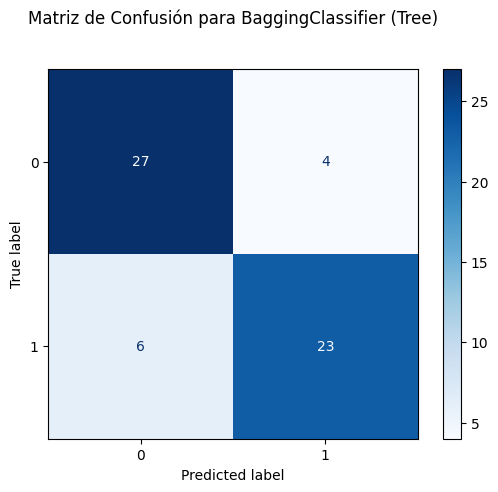


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.85      0.79      0.82        29

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [ ]:
# Calcular y mostrar la matriz de confusión
conf_matrix_BAGTree = confusion_matrix(y_test_Tree, pred_bagging_Tree)
disp_BAGTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_BAGTree)
disp_BAGTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para BaggingClassifier (Tree)', y=1.1)
plt.savefig('confusion_matrix_BAGTree.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_bagging_Tree))

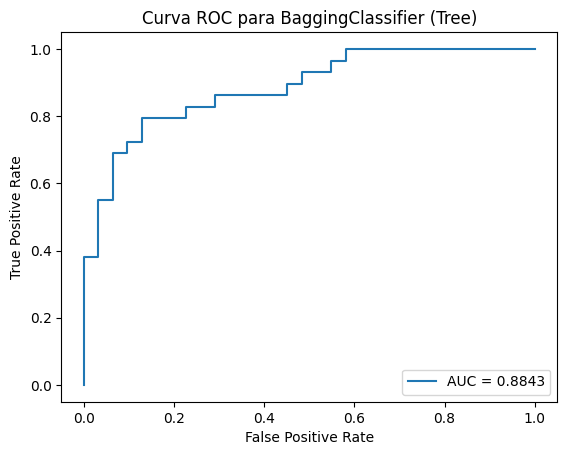

AUC: 0.8843


In [ ]:
y_pred_proba_BAGTree = bagging_clf_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_BAGTree, tpr_BAGTree, _ = roc_curve(y_test_Tree, y_pred_proba_BAGTree)
auc_BAGTree = roc_auc_score(y_test_Tree, y_pred_proba_BAGTree)

# Visualización de la curva ROC
plt.plot(fpr_BAGTree, tpr_BAGTree, label="AUC = " + str(round(auc_BAGTree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para BaggingClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_BAGTree:.4f}")

In [ ]:
# Guardar el modelo
joblib.dump(pred_bagging_Tree, 'best_bagging_clf_Tree.pkl')

['best_bagging_clf_Tree.pkl']

##ADABoost

###χ²

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
tree_ADACHI2 = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=8,                # Profundidad máxima del árbol base
    min_samples_leaf=2          # Mínimo de muestras en una hoja del árbol base
)

# Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
ada_boost_CHI2 = AdaBoostClassifier(
    estimator=tree_ADACHI2,
    n_estimators=25,           # 25 Número de clasificadores base
    learning_rate=0.78,          # Tasa de aprendizaje
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
ada_boost_CHI2.fit(X_train_CHI2, y_train_CHI2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                    min_samples_leaf=2,
                                                    random_state=42),
                   learning_rate=0.78, n_estimators=25, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_ada_CHI2 = ada_boost_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = ada_boost_CHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = accuracy_score(y_test_CHI2, pred_ada_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_ADACHI2 = cross_val_score(ada_boost_CHI2, X_train_CHI2, y_train_CHI2, cv=3, scoring='accuracy')
cv_mean_score_ADACHI2 = cv_scores_ADACHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (3 pliegues): {cv_mean_score_ADACHI2:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.7167
Precisión promedio de validación cruzada (3 pliegues): 0.6042


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


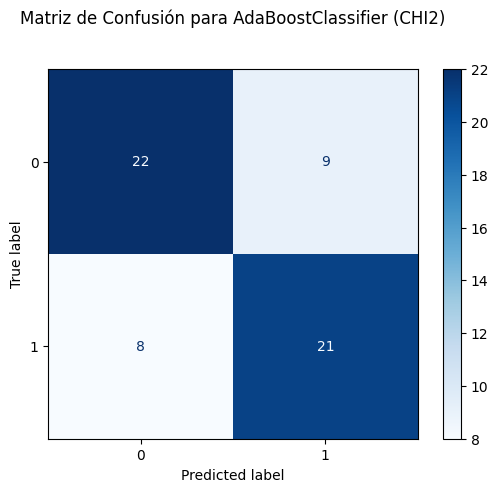


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        31
           1       0.70      0.72      0.71        29

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



In [ ]:
# Calcular y mostrar la matriz de confusión
conf_matrix_ADACHI2 = confusion_matrix(y_test_CHI2, pred_ada_CHI2)
disp_ADACHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ADACHI2)
disp_ADACHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para AdaBoostClassifier (CHI2)', y=1.1)
plt.savefig('confusion_matrix_ADACHI2.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_ada_CHI2))

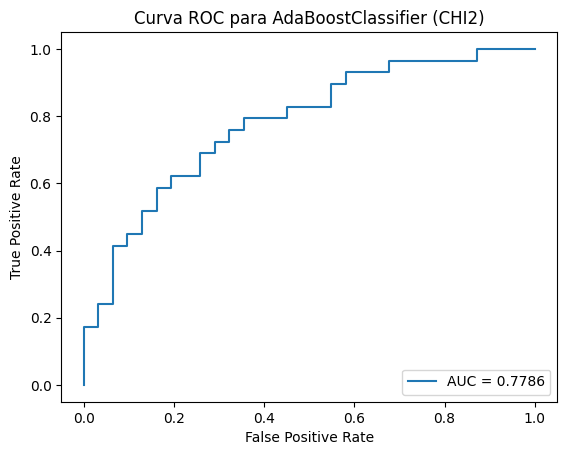

AUC: 0.7786


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_ADACHI2 = ada_boost_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_ADACHI2, tpr_ADACHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_ADACHI2)
auc_ADACHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_ADACHI2)

# Visualización de la curva ROC
plt.plot(fpr_ADACHI2, tpr_ADACHI2, label="AUC = " + str(round(auc_ADACHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para AdaBoostClassifier (CHI2)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_ADACHI2:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_ada_CHI2 , 'ADABoostCHI2_clf.pkl')

['ADABoostCHI2_clf.pkl']

###Matriz

In [ ]:
## Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
#tree_ADAMatrix = DecisionTreeClassifier(
#    criterion='gini',        # Función de calidad de la división
#    random_state=42,             # Semilla de aleatoriedad
#    max_depth=8,                # Profundidad máxima del árbol base
#    min_samples_leaf=2          # Mínimo de muestras en una hoja del árbol base
#)
#
## Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
#ada_boost_Matrix = AdaBoostClassifier(
#    estimator=tree_ADAMatrix,
#    n_estimators=25,           # Número de clasificadores base
#    learning_rate=0.78,          # Tasa de aprendizaje
#    random_state=42             # Semilla de aleatoriedad
#)
#
## Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
#ada_boost_Matrix.fit(X_train_Matrix, y_train_Matrix)

# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
tree_ADAMatrix = DecisionTreeClassifier(
    criterion='entropy',        # Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=7,                # Profundidad máxima del árbol base
    min_samples_leaf=2          # Mínimo de muestras en una hoja del árbol base
)

# Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
ada_boost_Matrix = AdaBoostClassifier(
    estimator=tree_ADAMatrix,
    n_estimators=97,           # Número de clasificadores base
    learning_rate=0.47,          # Tasa de aprendizaje
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
ada_boost_Matrix.fit(X_train_Matrix, y_train_Matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=7,
                                                    min_samples_leaf=2,
                                                    random_state=42),
                   learning_rate=0.47, n_estimators=97, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_ada_Matrix= ada_boost_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = ada_boost_Matrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_ada_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_ADAMatrix = cross_val_score(ada_boost_Matrix, X_train_Matrix, y_train_Matrix, cv=3, scoring='accuracy')
cv_mean_score_ADAMatrix = cv_scores_ADAMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (3 pliegues): {cv_mean_score_ADAMatrix:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.7167
Precisión promedio de validación cruzada (3 pliegues): 0.6292


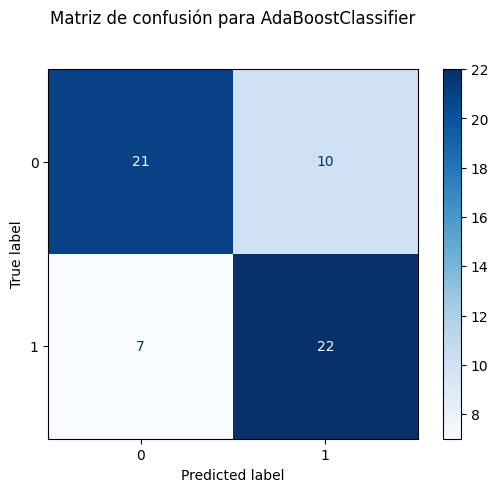


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71        31
           1       0.69      0.76      0.72        29

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_ADAMatrix = confusion_matrix(y_test_Matrix, pred_ada_Matrix)
disp_ADAMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ADAMatrix)
disp_ADAMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para AdaBoostClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_ada_Matrix))

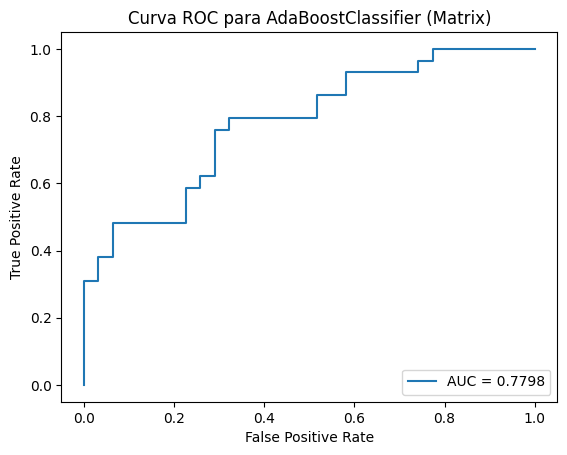

AUC: 0.7798


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_ADAMatrix = ada_boost_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_ADAMatrix, tpr_ADAMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_ADAMatrix)
auc_ADAMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_ADAMatrix)

# Visualización de la curva ROC
plt.plot(fpr_ADAMatrix, tpr_ADAMatrix, label="AUC = " + str(round(auc_ADAMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para AdaBoostClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_ADAMatrix:.4f}")


In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_ada_Matrix , 'ADABoostMatrix_clf.pkl')

['ADABoostMatrix_clf.pkl']

###Tree

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
tree_ADATree = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=4,                # Profundidad máxima del árbol base
    min_samples_leaf=1          # Mínimo de muestras en una hoja del árbol base
)

# Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
ada_boost_Tree = AdaBoostClassifier(
    estimator=tree_ADATree,
    n_estimators=200,           # Número de clasificadores     basen_estimators=200,
    learning_rate=0.75,          # Tasa de aprendizaje         learning_rate=1.00,
    random_state=42             # Semilla de aleatoriedad      random_state=42
)

# Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
ada_boost_Tree.fit(X_train_Tree, y_train_Tree)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=42),
                   learning_rate=0.75, n_estimators=200, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_ada_Tree = ada_boost_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = ada_boost_Tree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_ada_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_ADATree = cross_val_score(ada_boost_Tree, X_train_Tree, y_train_Tree, cv=3, scoring='accuracy')
cv_mean_score_ADATree = cv_scores_ADATree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (3 pliegues): {cv_mean_score_ADATree:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8500
Precisión promedio de validación cruzada (3 pliegues): 0.6833


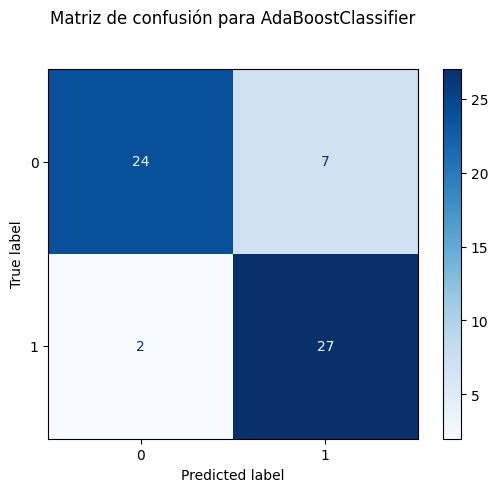


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.79      0.93      0.86        29

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_ADATree = confusion_matrix(y_test_Tree, pred_ada_Tree)
disp_ADATree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ADATree)
disp_ADATree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para AdaBoostClassifier', y=1.1)
plt.show()


# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_ada_Tree))

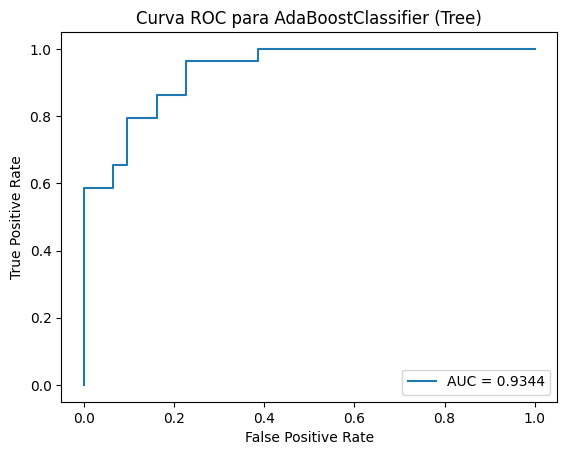

AUC: 0.9344


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_ADATree = ada_boost_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_ADATree, tpr_ADATree, _ = roc_curve(y_test_Tree, y_pred_proba_ADATree)
auc_ADATree = roc_auc_score(y_test_Tree, y_pred_proba_ADATree)

# Visualización de la curva ROC
plt.plot(fpr_ADATree, tpr_ADATree, label="AUC = " + str(round(auc_ADATree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para AdaBoostClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_ADATree:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_ada_Tree , 'ADABoostTree_clf.pkl')

['ADABoostTree_clf.pkl']

##Gradient Boosting

###χ²

In [ ]:
## Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
#gb_CHI2 = GradientBoostingClassifier(
#    n_estimators=100,             # Número de clasificadores base
#    learning_rate=0.05,            # Tasa de aprendizaje
#    max_depth=5,                  # Profundidad máxima de los árboles
#    min_samples_split=5,         # Mínimo de muestras para dividir un nodo
#    min_samples_leaf=2,           # Mínimo de muestras en una hoja
#    subsample=1,                # Fracción de muestras para entrenar cada árbol
#    max_features='sqrt',          # 'sqrt', 'log2' Características para dividir el nodo
#    random_state=42               # Semilla de aleatoriedad
#)
#
## Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
#gb_CHI2.fit(X_train_CHI2, y_train_CHI2)

# Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
gb_CHI2 = GradientBoostingClassifier(
    n_estimators=300,             # Número de clasificadores base
    learning_rate=0.01,            # Tasa de aprendizaje
    max_depth=4,                  # Profundidad máxima de los árboles
    min_samples_split=16,         # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,           # Mínimo de muestras en una hoja
    subsample=1,                # Fracción de muestras para entrenar cada árbol
    max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    random_state=42               # Semilla de aleatoriedad
)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gb_CHI2.fit(X_train_CHI2, y_train_CHI2)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2',
                           min_samples_leaf=4, min_samples_split=16,
                           n_estimators=300, random_state=42, subsample=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_gb_CHI2 = gb_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = gb_CHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = accuracy_score(y_test_CHI2, pred_gb_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_GBCHI2 = cross_val_score(gb_CHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')
cv_mean_score_GBCHI2 = cv_scores_GBCHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_GBCHI2:.4f}")


Precisión en el conjunto de entrenamiento: 0.9375
Precisión en el conjunto de prueba: 0.7667
Precisión promedio de validación cruzada (10 pliegues): 0.6375


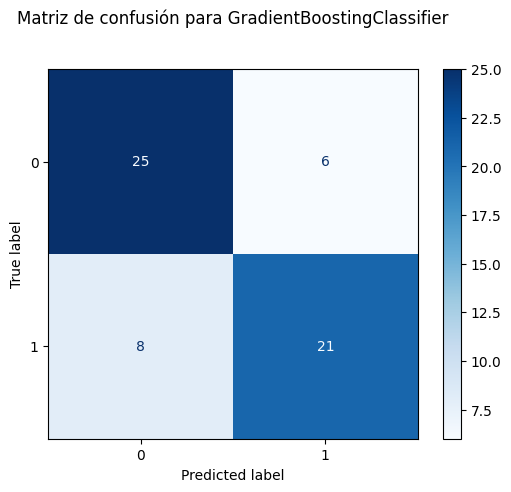


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78        31
           1       0.78      0.72      0.75        29

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_GBCHI2 = confusion_matrix(y_test_CHI2, pred_gb_CHI2)
disp_GBCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GBCHI2)
disp_GBCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para GradientBoostingClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_gb_CHI2))

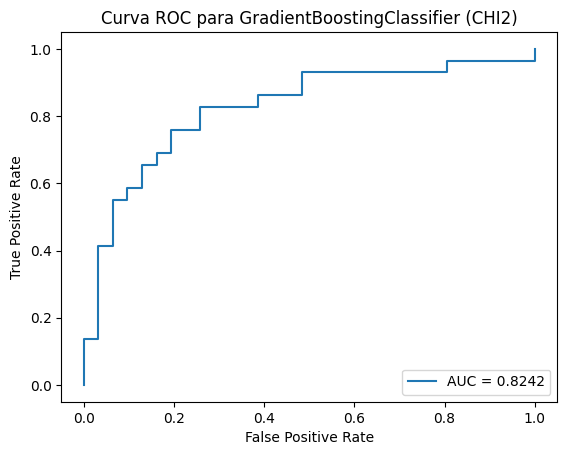

AUC: 0.8242491657397109


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_GBCHI2 = gb_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_GBCHI2, tpr_GBCHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_GBCHI2)
auc_GBCHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_GBCHI2)

# Visualización de la curva ROC
plt.plot(fpr_GBCHI2, tpr_GBCHI2, label="AUC = " + str(round(auc_GBCHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para GradientBoostingClassifier (CHI2)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_GBCHI2}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_gb_CHI2 , 'GB_clf_CHI2.pkl')

['GB_clf_CHI2.pkl']

###Matriz

In [ ]:
# Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
gb_Matrix = GradientBoostingClassifier(
    n_estimators=300,             # Número de clasificadores base
    learning_rate=0.01,            # Tasa de aprendizaje
    max_depth=4,                  # Profundidad máxima de los árboles
    min_samples_split=16,         # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,           # Mínimo de muestras en una hoja
    subsample=1,                # Fracción de muestras para entrenar cada árbol
    max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    random_state=42               # Semilla de aleatoriedad
)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gb_Matrix.fit(X_train_Matrix, y_train_Matrix)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2',
                           min_samples_leaf=4, min_samples_split=16,
                           n_estimators=300, random_state=42, subsample=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_gb_Matrix = gb_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = gb_Matrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_gb_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_GBMatrix = cross_val_score(gb_Matrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')
cv_mean_score_GBMatrix = cv_scores_GBMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_GBMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 0.9375
Precisión en el conjunto de prueba: 0.7667
Precisión promedio de validación cruzada (10 pliegues): 0.6375


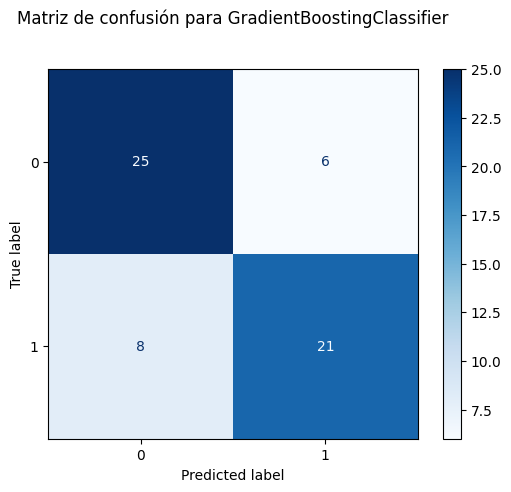


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78        31
           1       0.78      0.72      0.75        29

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_GBMatrix = confusion_matrix(y_test_Matrix, pred_gb_Matrix)
disp_GBMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GBMatrix)
disp_GBMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para GradientBoostingClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_gb_Matrix))

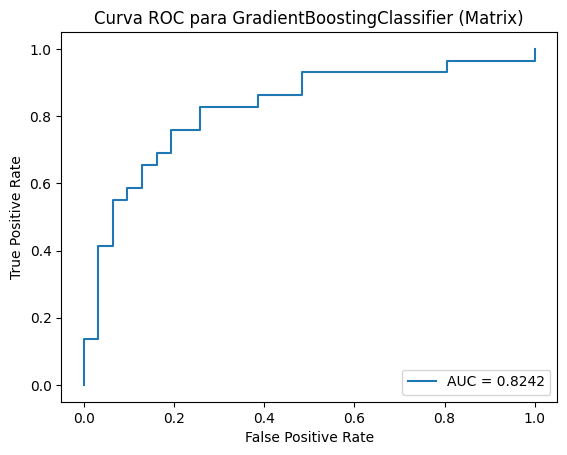

AUC: 0.8242


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_GBMatrix = gb_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_GBMatrix, tpr_GBMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_GBMatrix)
auc_GBMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_GBMatrix)

# Visualización de la curva ROC
plt.plot(fpr_GBMatrix, tpr_GBMatrix, label="AUC = " + str(round(auc_GBMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para GradientBoostingClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_GBMatrix:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_gb_Matrix , 'GB_clf_Matrix.pkl')

['GB_clf_Matrix.pkl']

###Tree

In [ ]:
# Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
gb_Tree = GradientBoostingClassifier(

    #n_estimators=500,             # Número de clasificadores base
    #learning_rate=0.63,           # Tasa de aprendizaje
    #max_depth=5,                  # Profundidad máxima de los árboles
    #min_samples_split=7,         # Mínimo de muestras para dividir un nodo
    #min_samples_leaf=10,          # Mínimo de muestras en una hoja
    #subsample=1,                  # Fracción de muestras para entrenar cada árbol
    #max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    #random_state=42               # Semilla de aleatoriedad
    n_estimators=500,             # Número de clasificadores base
    learning_rate=0.63,           # Tasa de aprendizaje
    max_depth=5,                  # Profundidad máxima de los árboles
    min_samples_split=6,         # Mínimo de muestras para dividir un nodo
    min_samples_leaf=10,          # Mínimo de muestras en una hoja
    subsample=1,                  # Fracción de muestras para entrenar cada árbol
    max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    random_state=42               # Semilla de aleatoriedad
)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gb_Tree.fit(X_train_Tree, y_train_Tree)

GradientBoostingClassifier(learning_rate=0.63, max_depth=5, max_features='log2',
                           min_samples_leaf=10, min_samples_split=6,
                           n_estimators=500, random_state=42, subsample=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_gb_Tree = gb_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = gb_Tree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_gb_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_GBTree = cross_val_score(gb_Tree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_GBTree = cv_scores_GBTree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_GBTree:.4f}")


Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8333
Precisión promedio de validación cruzada (10 pliegues): 0.6958


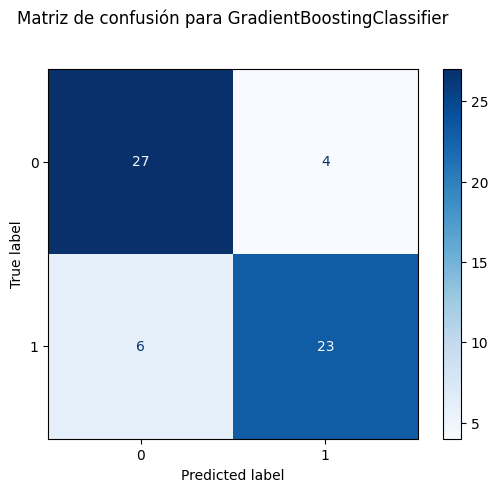


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.85      0.79      0.82        29

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_GBTree = confusion_matrix(y_test_Tree, pred_gb_Tree)
disp_GBTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GBTree)
disp_GBTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para GradientBoostingClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_gb_Tree))

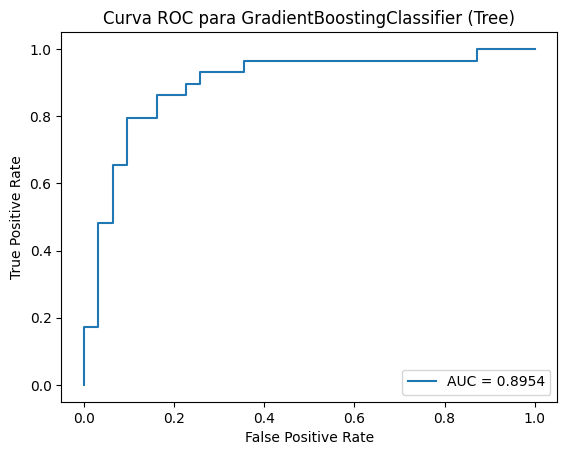

AUC: 0.8954


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_GBTree = gb_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_GBTree, tpr_GBTree, _ = roc_curve(y_test_Tree, y_pred_proba_GBTree)
auc_GBTree = roc_auc_score(y_test_Tree, y_pred_proba_GBTree)

# Visualización de la curva ROC
plt.plot(fpr_GBTree, tpr_GBTree, label="AUC = " + str(round(auc_GBTree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para GradientBoostingClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_GBTree:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_gb_Tree , 'GB_clf_Tree.pkl')

['GB_clf_Tree.pkl']

#Tabla de comparación

In [ ]:
chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score", "VC"],
        'DT_CHI2':[accuracy_score(y_test_CHI2, predDTCHI2), f1_score(y_test_CHI2, predDTCHI2), recall_score(y_test_CHI2, predDTCHI2), precision_score(y_test_CHI2, predDTCHI2), r2_score(y_test_CHI2, predDTCHI2),scoresdtCHI2.mean()],
        'DT_Mat':[accuracy_score(y_test_Matrix, predDTMatrix), f1_score(y_test_Matrix, predDTMatrix), recall_score(y_test_Matrix, predDTMatrix), precision_score(y_test_Matrix, predDTMatrix), r2_score(y_test_Matrix, predDTMatrix),scoresdtMatrix.mean()],
        'DT_Tree':[accuracy_score(y_test_Tree, predDTTree), f1_score(y_test_Tree, predDTTree), recall_score(y_test_Tree, predDTTree), precision_score(y_test_Tree, predDTTree), r2_score(y_test_Tree, predDTTree),scores_DTTree.mean()],
        'KNN_CHI2':[accuracy_score(y_test_CHI2, pred_knn_CHI2), f1_score(y_test_CHI2, pred_knn_CHI2), recall_score(y_test_CHI2, pred_knn_CHI2), precision_score(y_test_CHI2, pred_knn_CHI2), r2_score(y_test_CHI2, pred_knn_CHI2),cv_score_mean],
        'KNN_Mat':[accuracy_score(y_test_Matrix, pred_knn_Matrix), f1_score(y_test_Matrix, pred_knn_Matrix), recall_score(y_test_Matrix, pred_knn_Matrix), precision_score(y_test_Matrix, pred_knn_Matrix), r2_score(y_test_Matrix, pred_knn_Matrix),cv_mean_score_Matrix],
        'KNN_Tree':[accuracy_score(y_test_Tree, pred_knn_Tree), f1_score(y_test_Tree, pred_knn_Tree), recall_score(y_test_Tree, pred_knn_Tree), precision_score(y_test_Tree, pred_knn_Tree), r2_score(y_test_Tree, pred_knn_Tree),cv_mean_score_Tree],
        'RF_CHI2':[accuracy_score(y_test_CHI2, pred_rf_CHI2), f1_score(y_test_CHI2, pred_rf_CHI2), recall_score(y_test_CHI2, pred_rf_CHI2), precision_score(y_test_CHI2, pred_rf_CHI2), r2_score(y_test_CHI2, pred_rf_CHI2),cv_mean_score_rfCHI2],
        'RF_Mat':[accuracy_score(y_test_Matrix, pred_rf_Matrix), f1_score(y_test_Matrix, pred_rf_Matrix), recall_score(y_test_Matrix, pred_rf_Matrix), precision_score(y_test_Matrix, pred_rf_Matrix), r2_score(y_test_Matrix, pred_rf_Matrix),cv_mean_score_rfMatrix],
        'RF_Tree':[accuracy_score(y_test_Tree, pred_rf_Tree), f1_score(y_test_Tree, pred_rf_Tree), recall_score(y_test_Tree, pred_rf_Tree), precision_score(y_test_Tree, pred_rf_Tree), r2_score(y_test_Tree, pred_rf_Tree),cv_mean_score_rfTree],
        'Bag_CHI2':[accuracy_score(y_test_CHI2, pred_bagging_CHI2), f1_score(y_test_CHI2, pred_bagging_CHI2), recall_score(y_test_CHI2, pred_bagging_CHI2), precision_score(y_test_CHI2, pred_bagging_CHI2), r2_score(y_test_CHI2, pred_bagging_CHI2),cv_mean_score_BAGCHI2],
        'Bag_Mat':[accuracy_score(y_test_Matrix, pred_bagging_Matrix), f1_score(y_test_Matrix, pred_bagging_Matrix), recall_score(y_test_Matrix, pred_bagging_Matrix), precision_score(y_test_Matrix, pred_bagging_Matrix), r2_score(y_test_Matrix, pred_bagging_Matrix),cv_mean_score_BAGMatrix],
        'Bag_Tree':[accuracy_score(y_test_Tree, pred_bagging_Tree), f1_score(y_test_Tree, pred_bagging_Tree), recall_score(y_test_Tree, pred_bagging_Tree), precision_score(y_test_Tree, pred_bagging_Tree), r2_score(y_test_Tree,  pred_bagging_Tree),cv_mean_score_BAGTree],
        'ADAB_CHI2':[accuracy_score(y_test_CHI2, pred_ada_CHI2), f1_score(y_test_CHI2, pred_ada_CHI2), recall_score(y_test_CHI2, pred_ada_CHI2), precision_score(y_test_CHI2, pred_ada_CHI2), r2_score(y_test_CHI2, pred_ada_CHI2),cv_mean_score_ADACHI2],
        'ADAB_Mat':[accuracy_score(y_test_Matrix, pred_ada_Matrix), f1_score(y_test_Matrix, pred_ada_Matrix), recall_score(y_test_Matrix, pred_ada_Matrix), precision_score(y_test_Matrix, pred_ada_Matrix), r2_score(y_test_Matrix, pred_ada_Matrix),cv_mean_score_ADAMatrix],
        'ADAB_Tree':[accuracy_score(y_test_Tree, pred_ada_Tree), f1_score(y_test_Tree, pred_ada_Tree), recall_score(y_test_Tree, pred_ada_Tree), precision_score(y_test_Tree, pred_ada_Tree), r2_score(y_test_Tree, pred_ada_Tree),cv_mean_score_ADATree],
        'GB_CHI2':[accuracy_score(y_test_CHI2, pred_gb_CHI2), f1_score(y_test_CHI2, pred_gb_CHI2), recall_score(y_test_CHI2, pred_gb_CHI2), precision_score(y_test_CHI2, pred_gb_CHI2), r2_score(y_test_CHI2, pred_gb_CHI2),cv_mean_score_GBCHI2],
        'GB_Mat':[accuracy_score(y_test_Matrix, pred_gb_Matrix), f1_score(y_test_Matrix, pred_gb_Matrix), recall_score(y_test_Matrix, pred_gb_Matrix), precision_score(y_test_Matrix, pred_gb_Matrix), r2_score(y_test_Matrix, pred_gb_Matrix),cv_mean_score_GBMatrix],
        'GB_Tree':[accuracy_score(y_test_Tree, pred_gb_Tree), f1_score(y_test_Tree, pred_gb_Tree), recall_score(y_test_Tree, pred_gb_Tree), precision_score(y_test_Tree, pred_gb_Tree), r2_score(y_test_Tree, pred_gb_Tree),cv_mean_score_GBTree]
        }
chart = pd.DataFrame(chart)


In [ ]:
display(chart)

,Metric,DT_CHI2,DT_Mat,DT_Tree,KNN_CHI2,KNN_Mat,KNN_Tree,RF_CHI2,RF_Mat,RF_Tree,Bag_CHI2,Bag_Mat,Bag_Tree,ADAB_CHI2,ADAB_Mat,ADAB_Tree,GB_CHI2,GB_Mat,GB_Tree
0,Accuracy,0.750000,0.750000,0.800000,0.733333,0.733333,0.800000,0.783333,0.800000,0.800000,0.766667,0.766667,0.833333,0.716667,0.716667,0.850000,0.766667,0.766667,0.833333
1,F1-Score,0.705882,0.705882,0.800000,0.692308,0.692308,0.777778,0.754717,0.777778,0.769231,0.708333,0.708333,0.821429,0.711864,0.721311,0.857143,0.750000,0.750000,0.821429
2,Recall,0.620690,0.620690,0.827586,0.620690,0.620690,0.724138,0.689655,0.724138,0.689655,0.586207,0.586207,0.793103,0.724138,0.758621,0.931034,0.724138,0.724138,0.793103
3,Precision,0.818182,0.818182,0.774194,0.782609,0.782609,0.840000,0.833333,0.840000,0.869565,0.894737,0.894737,0.851852,0.700000,0.687500,0.794118,0.777778,0.777778,0.851852
4,R2-Score,-0.001112,-0.001112,0.199110,-0.067853,-0.067853,0.199110,0.132369,0.199110,0.199110,0.065628,0.065628,0.332592,-0.134594,-0.134594,0.399333,0.065628,0.065628,0.332592
5,VC,0.646667,0.636667,0.670000,0.625000,0.625000,0.687500,0.616667,0.604167,0.687500,0.662500,0.662500,0.729167,0.604167,0.629167,0.683333,0.637500,0.637500,0.695833
